# import modules

In [1]:
import glob
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver1 import *

# as a function of $\Delta t_d$ while fixing $I$

In [2]:
filepath = "../data/TACC_contours_mcz30_td_2024-05-06.pkl"
with open(filepath, "rb") as f:
    data_td = pickle.load(f)

data_td = get_contours_stats(data_td, thres_factor=1.01, thres_diff=0)

data_td

{0.013647: {'contour': {'omega_matrix': array([[0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          ...,
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ]]),
   'theta_matrix': array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
          [0.125, 0.125, 0.125, ..., 0.125, 0.125, 0.125],
          [0.25 , 0.25 , 0.25 , ..., 0.25 , 0.25 , 0.25 ],
          ...,
          [7.75 , 7.75 , 7.75 , ..., 7.75 , 7.75 , 7.75 ],
          [7.875, 7.875, 7.875, ..., 7.875, 7.875, 7.875],
          [8.   , 8.   , 8.   , ..., 8.   , 8.   , 8.   ]]),
   'epsilon_matrix': array([[0.22984096, 0.22984096, 0.22984096, ..., 0.22984096, 0.22984096,
           0.22984096],
          [0.2292752 , 0.22915696, 0.22887448, ..., 0.22314389, 0.22321397,
           0.22328837],
          [0.22868502, 0.22846315, 0.22790927, ..., 0.21648

In [3]:
mcz = 30
td_max = data_td["td_arr"][-1]
print("max td:", td_max)
print("max cycles in lensed:", td_max * (get_fcut_from_mcz(mcz) - 20))

RP_params = copy.deepcopy(RP_params_1)
RP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 3

print(get_lens_limits_for_RP_L(RP_params, lower=0.5))
xlim = get_lens_limits_for_RP_L(RP_params, lower=0.5)["td_max"]
print("max cycles in precessing:", xlim * (get_fcut_from_mcz(mcz) - 20))

max td: 0.047469
max cycles in lensed: 2.0786519392916314
{'MLz_min': 1155.9147550199762, 'MLz_max': 3214.535921623008, 'td_min': 0.011418217524232704, 'td_max': 0.03175344049649841}
max cycles in precessing: 1.3904727436269533


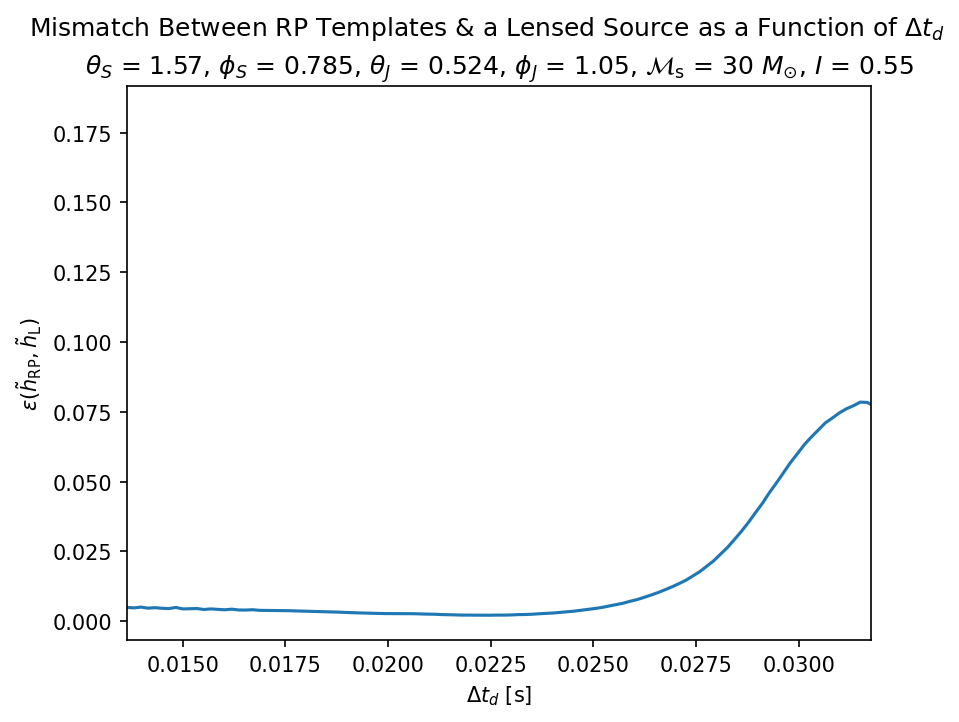

In [4]:
src_params = data_td["source_params"]
td_arr = data_td["td_arr"]
td_ep_min_arr = np.array([data_td[td]["stats"]["ep_min"] for td in td_arr])

plt.plot(td_arr, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.xlim(td_arr[0], xlim)
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

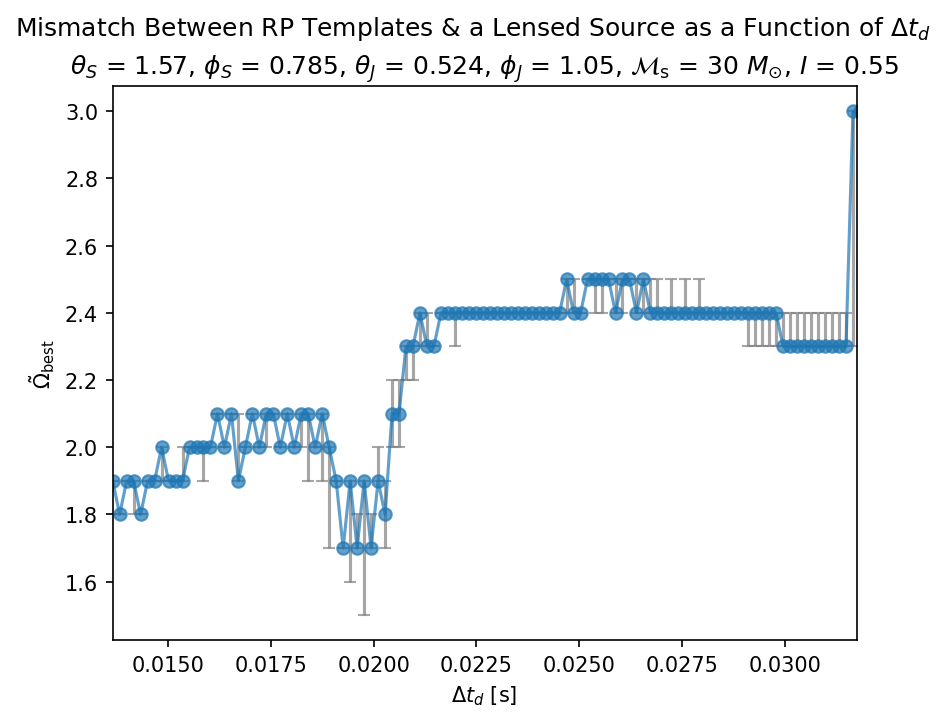

In [5]:
src_params = data_td["source_params"]
td_arr = data_td["td_arr"]
td_best_omega_arr = np.array(
    [data_td[td]["stats"]["ep_min_omega_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_best_omega_arr,
    yerr=get_asym_err(data_td, td_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.xlim(td_arr[0], xlim)
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

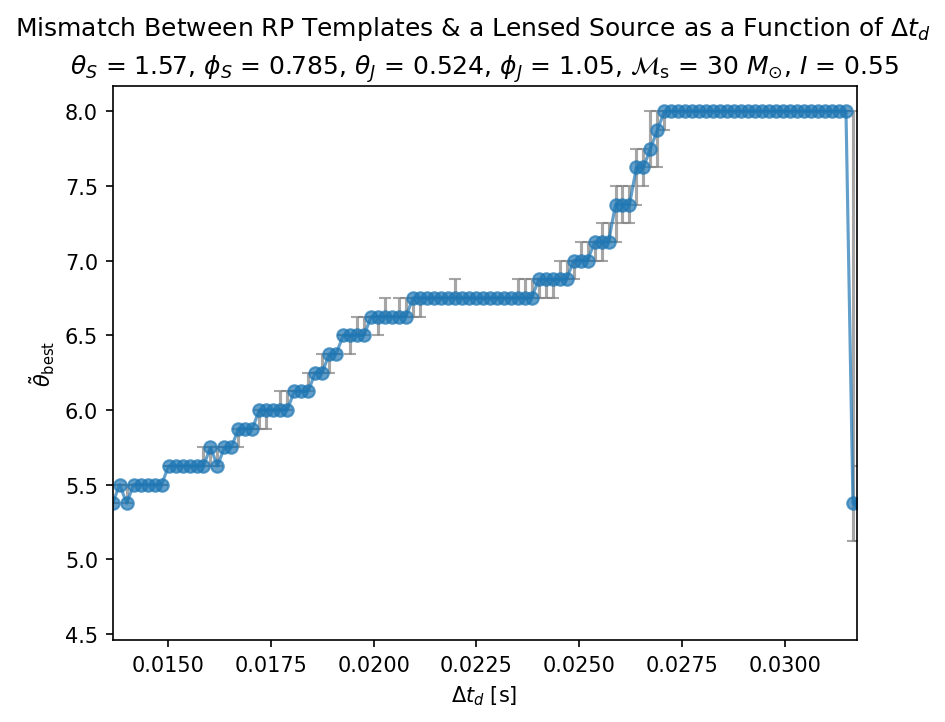

In [6]:
src_params = data_td["source_params"]
td_arr = data_td["td_arr"]
td_best_theta_arr = np.array(
    [data_td[td]["stats"]["ep_min_theta_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_best_theta_arr,
    yerr=get_asym_err(data_td, td_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.xlim(td_arr[0], xlim)
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [7]:
interact(
    plot_indiv_contour_from_dict,
    d=fixed(data_td),
    k=SelectionSlider(options=td_arr),
    n_levels=fixed(100),
)

interactive(children=(SelectionSlider(description='k', options=(0.013647, 0.013817, 0.013987, 0.014157, 0.0143…

<function modules.contours_ver1.plot_individual_contour(d: dict, k: float, n_levels=100)>

# as a function of $I$ while fixing $\Delta t_d$

In [6]:
filepath = "../data/TACC_contours_mcz30_I_2024-05-06.pkl"
with open(filepath, "rb") as f:
    data_I = pickle.load(f)

data_I = get_contours_stats(data_I, thres_factor=1.01, thres_diff=0)

data_I

{0.008404: {'contour': {'omega_matrix': array([[0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          ...,
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ]]),
   'theta_matrix': array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
          [0.125, 0.125, 0.125, ..., 0.125, 0.125, 0.125],
          [0.25 , 0.25 , 0.25 , ..., 0.25 , 0.25 , 0.25 ],
          ...,
          [7.75 , 7.75 , 7.75 , ..., 7.75 , 7.75 , 7.75 ],
          [7.875, 7.875, 7.875, ..., 7.875, 7.875, 7.875],
          [8.   , 8.   , 8.   , ..., 8.   , 8.   , 8.   ]]),
   'epsilon_matrix': array([[0.0031506 , 0.0031506 , 0.0031506 , ..., 0.0031506 , 0.0031506 ,
           0.0031506 ],
          [0.00309859, 0.00308956, 0.00306801, ..., 0.00234763, 0.00234249,
           0.00233907],
          [0.00304987, 0.00303132, 0.00298902, ..., 0.00168

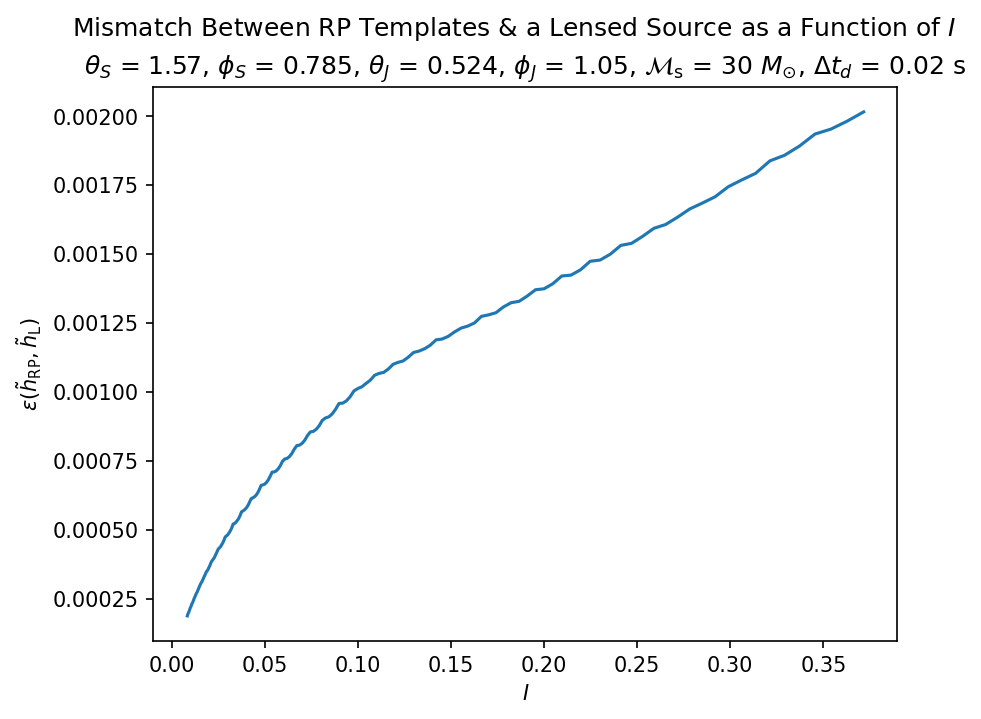

In [7]:
src_params = data_I["source_params"]
I_arr = data_I["I_arr"]
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

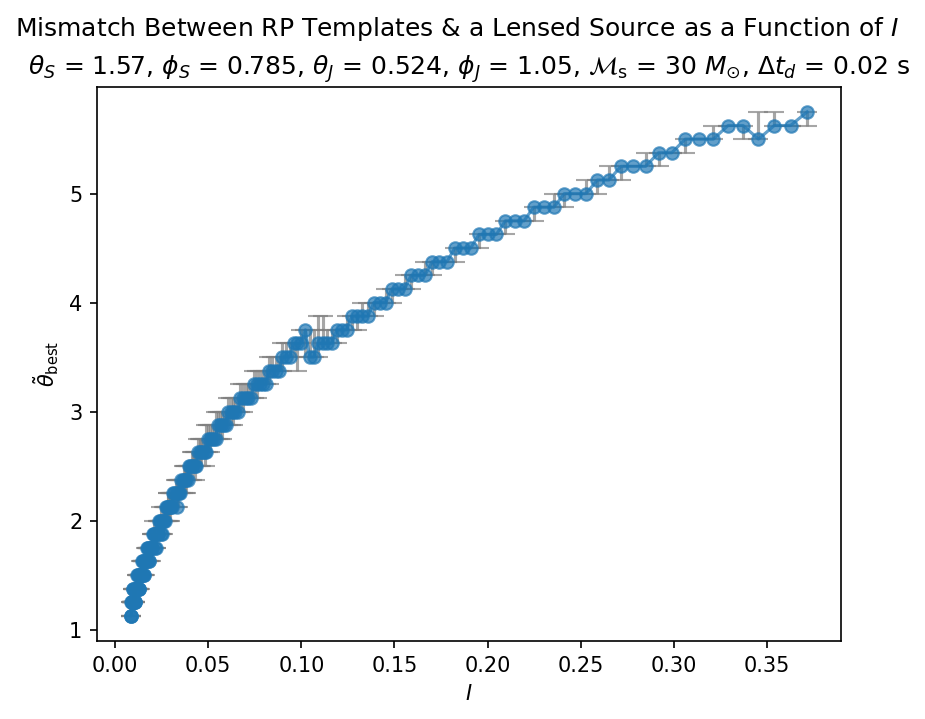

In [8]:
src_params = data_I["source_params"]
I_arr = data_I["I_arr"]
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

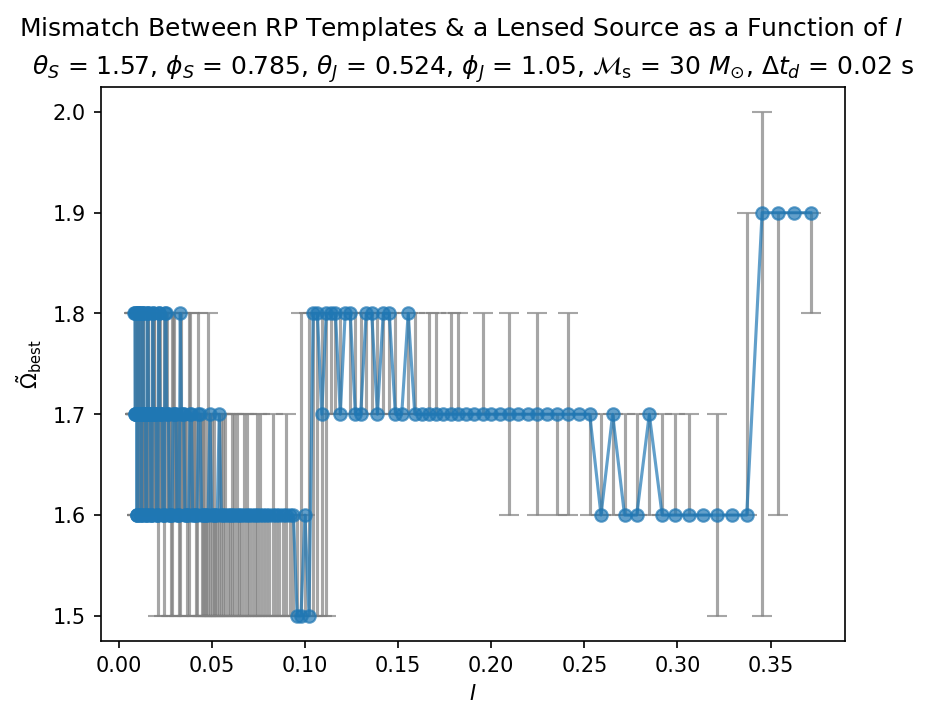

In [9]:
src_params = data_I["source_params"]
I_arr = data_I["I_arr"]
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

# waveform comparison

idx = -3.5148e-08, phi = 2.22127e-08, both should be ~0 if get_updated_mismatch_results is True


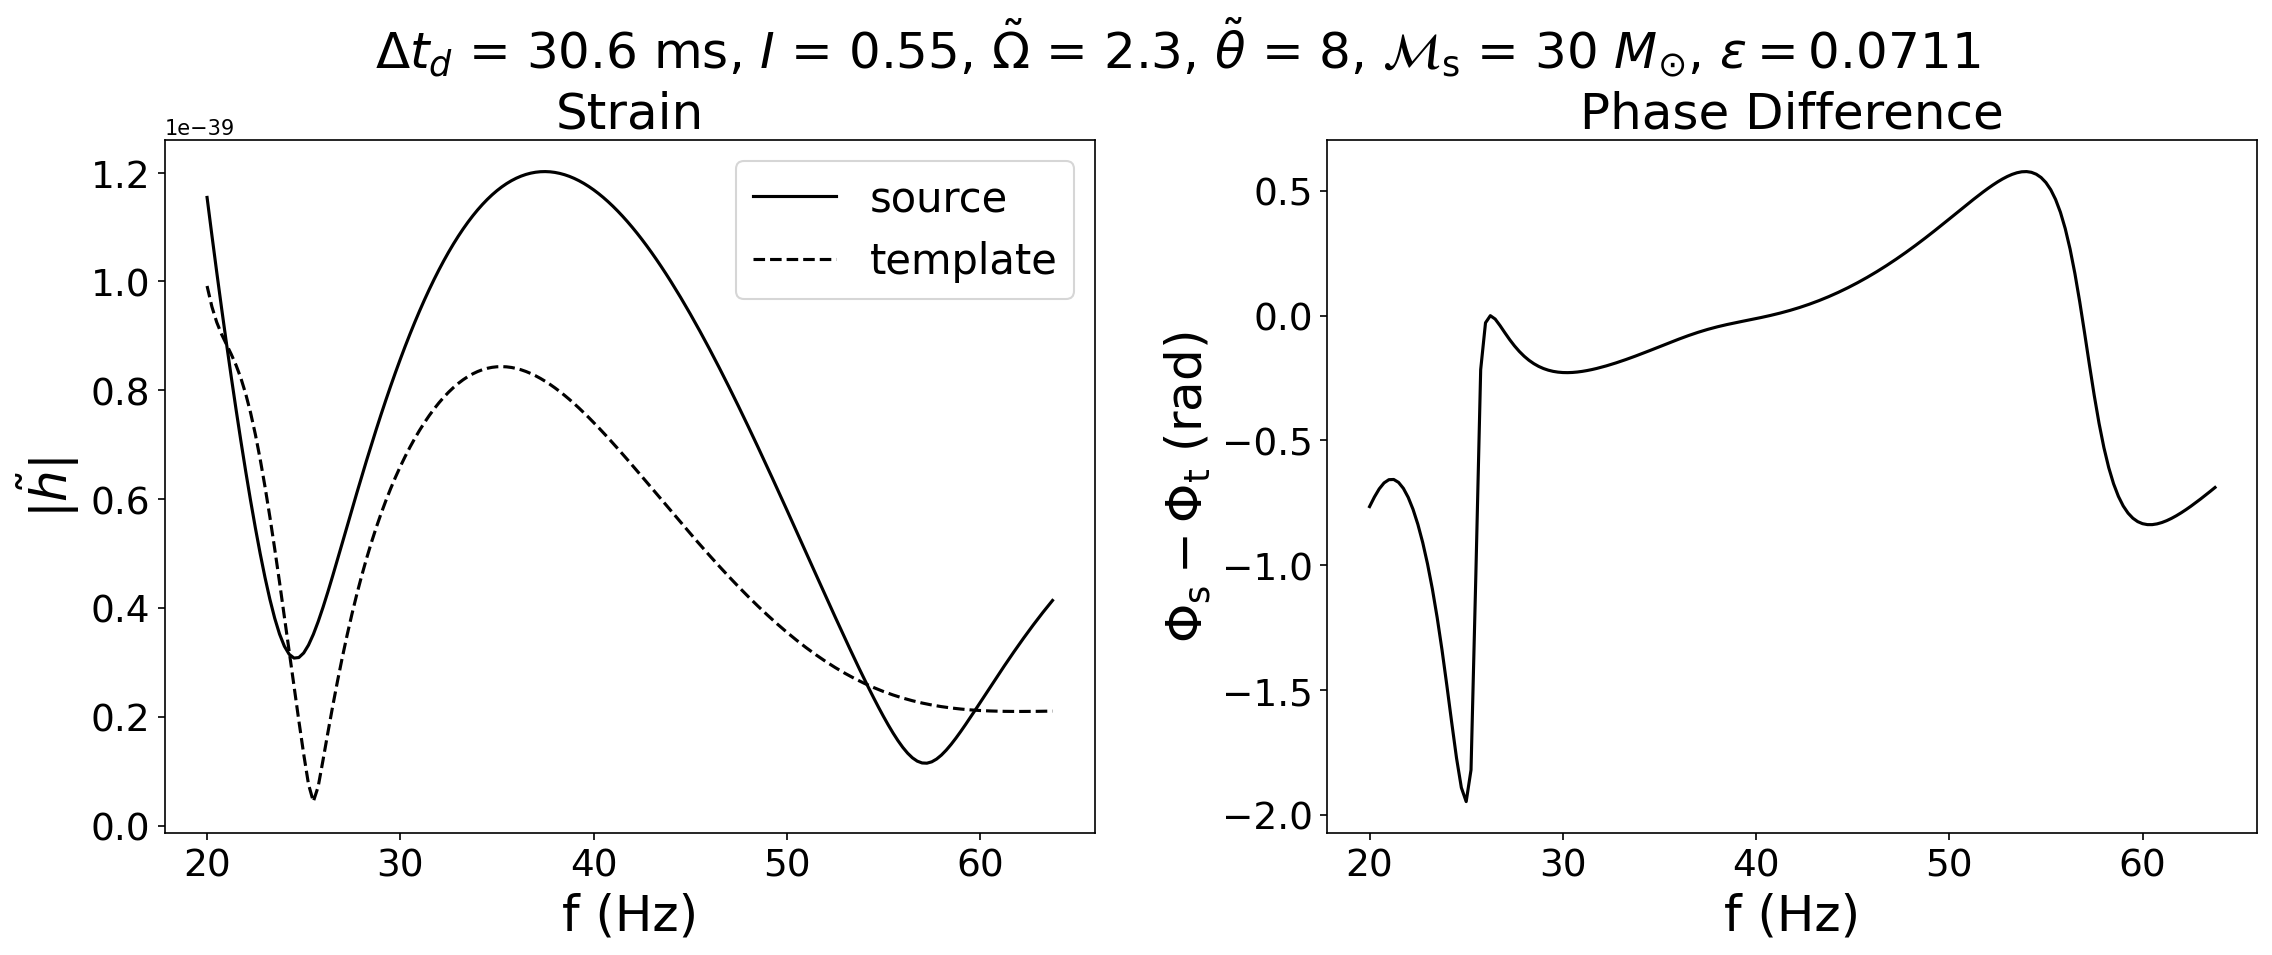

idx = -2.4828e-08, phi = -2.71553e-09, both should be ~0 if get_updated_mismatch_results is True


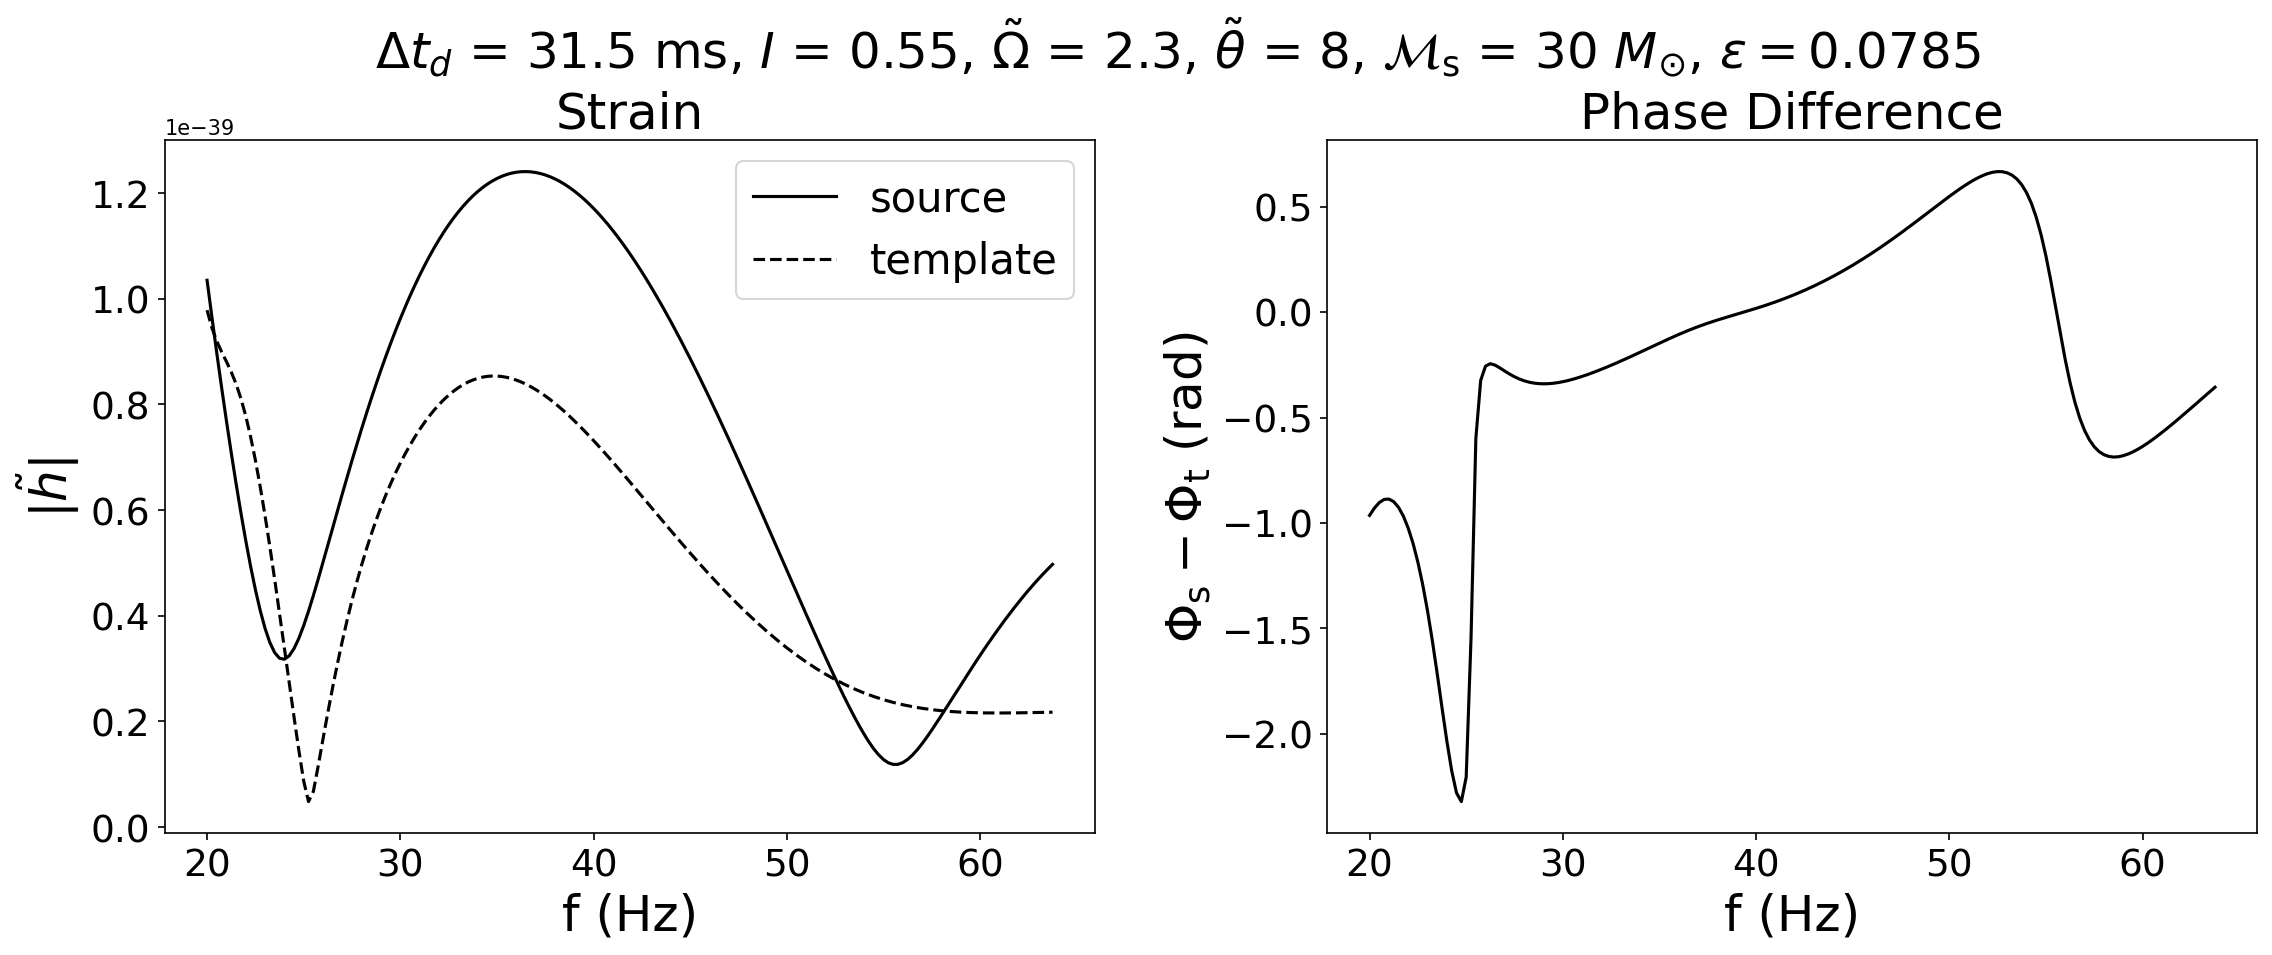

idx = 1.4078e-08, phi = -1.43834e-08, both should be ~0 if get_updated_mismatch_results is True


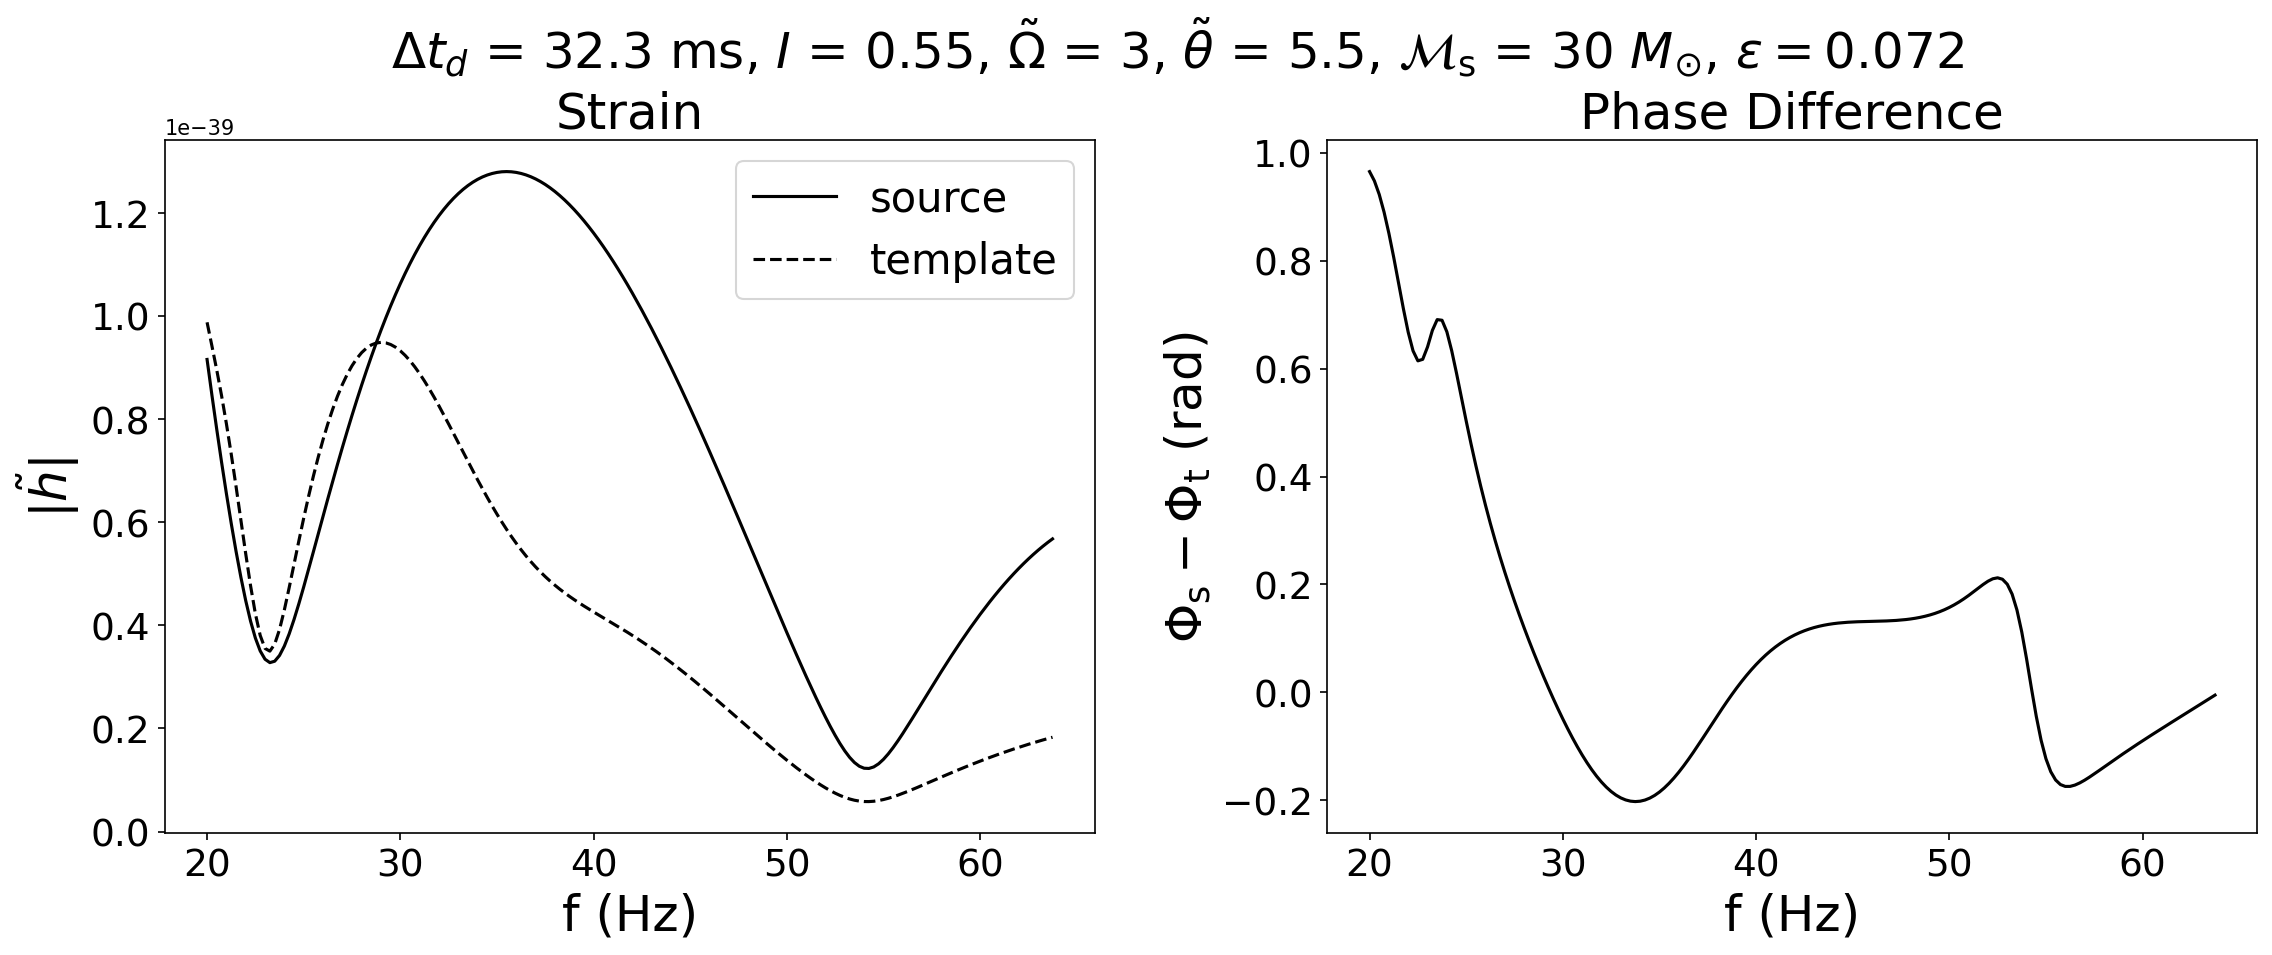

idx = -1.10178e-08, phi = -1.38884e-09, both should be ~0 if get_updated_mismatch_results is True


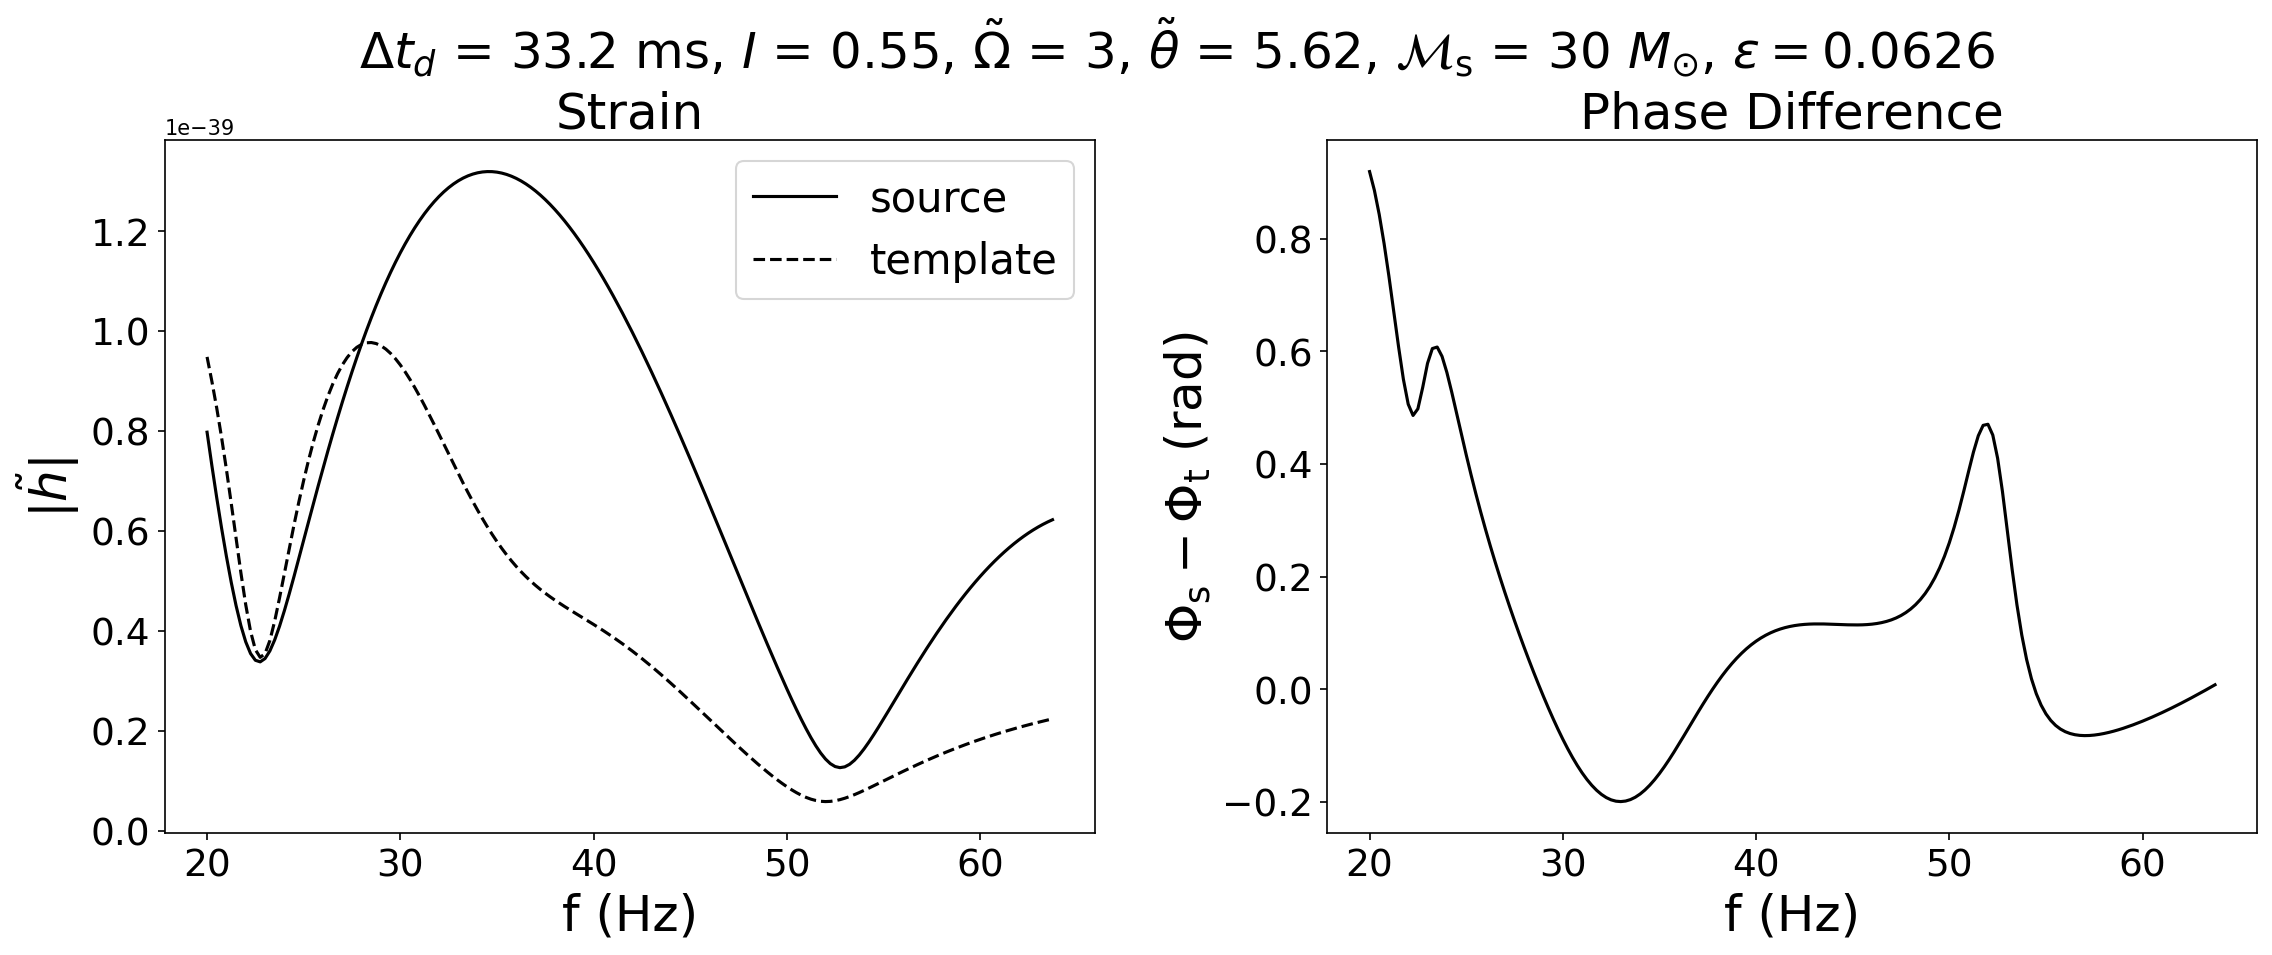

idx = -6.58703e-09, phi = 1.79447e-08, both should be ~0 if get_updated_mismatch_results is True


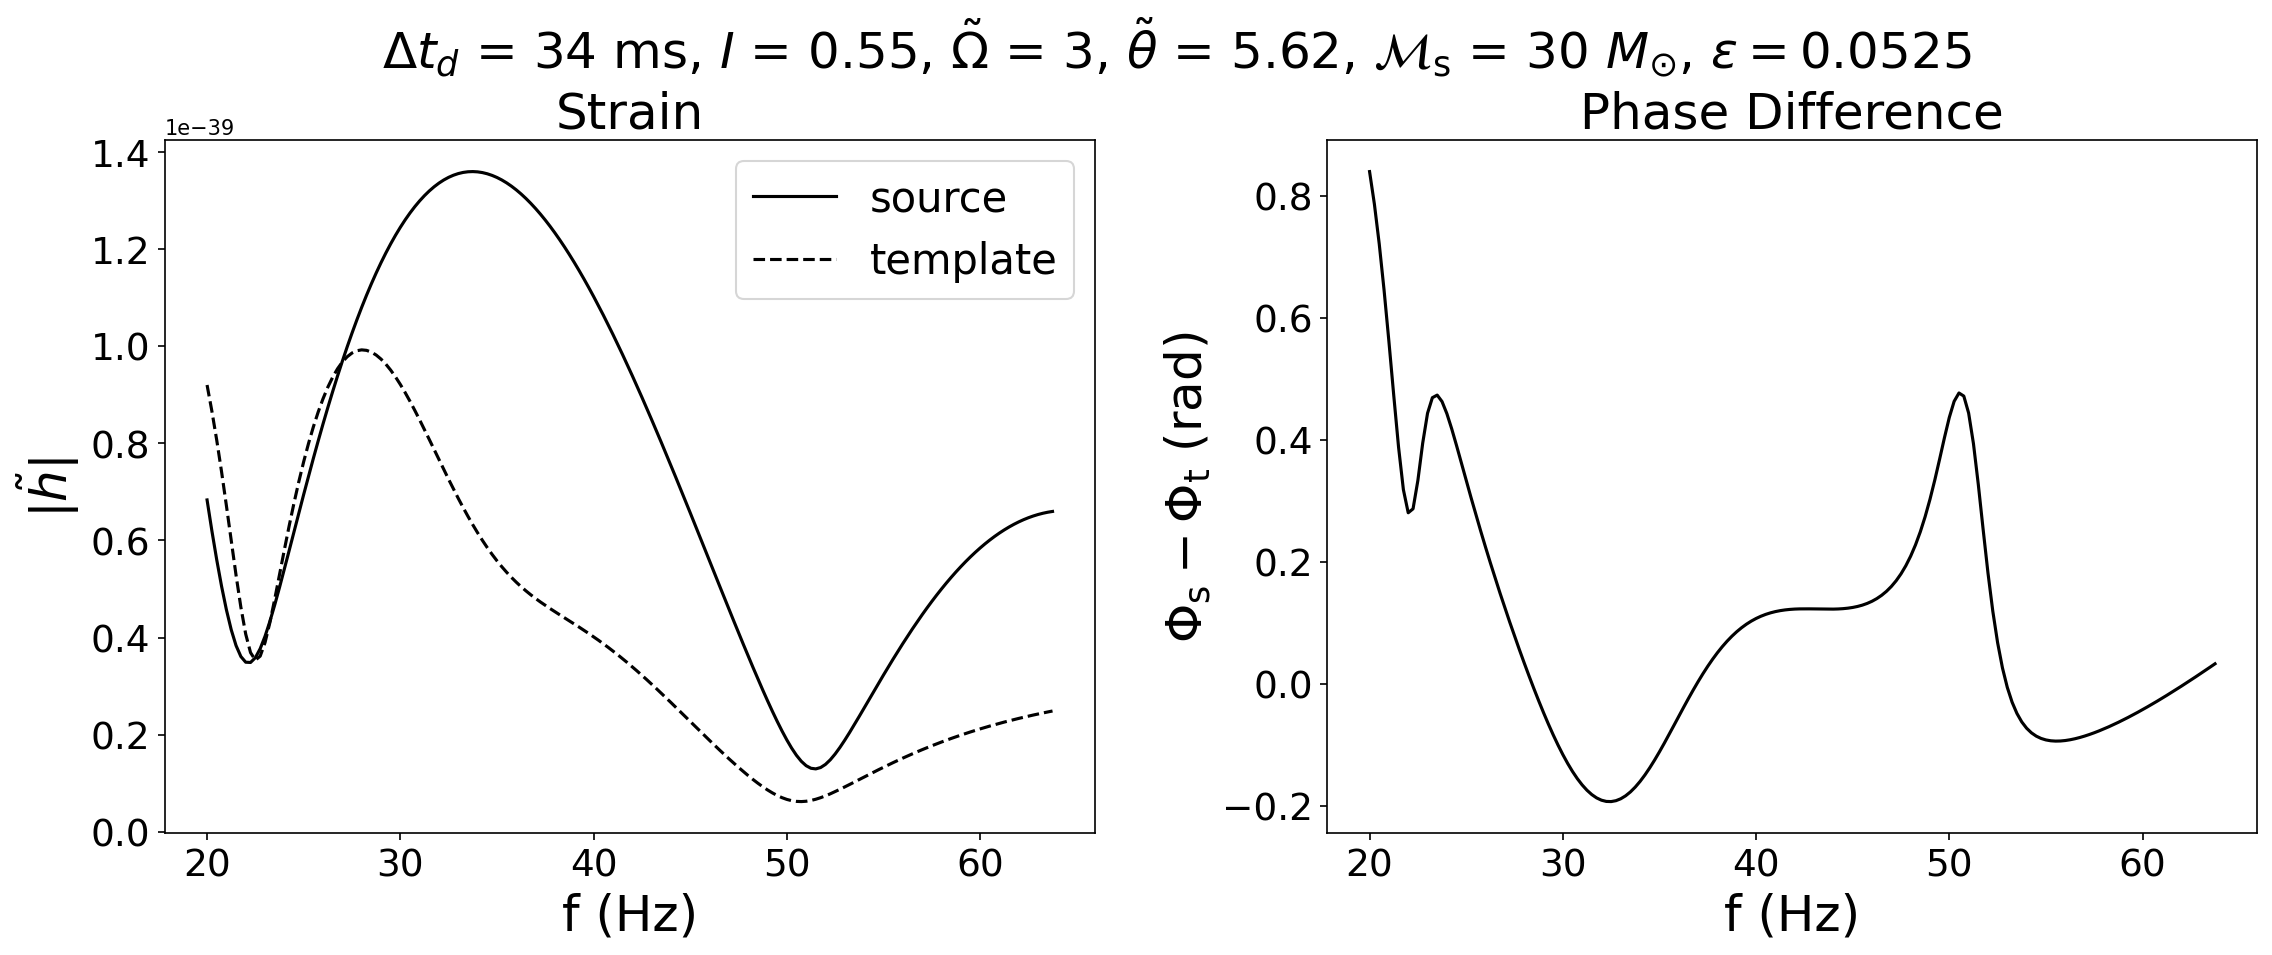

idx = 1.87404e-08, phi = -2.92147e-08, both should be ~0 if get_updated_mismatch_results is True


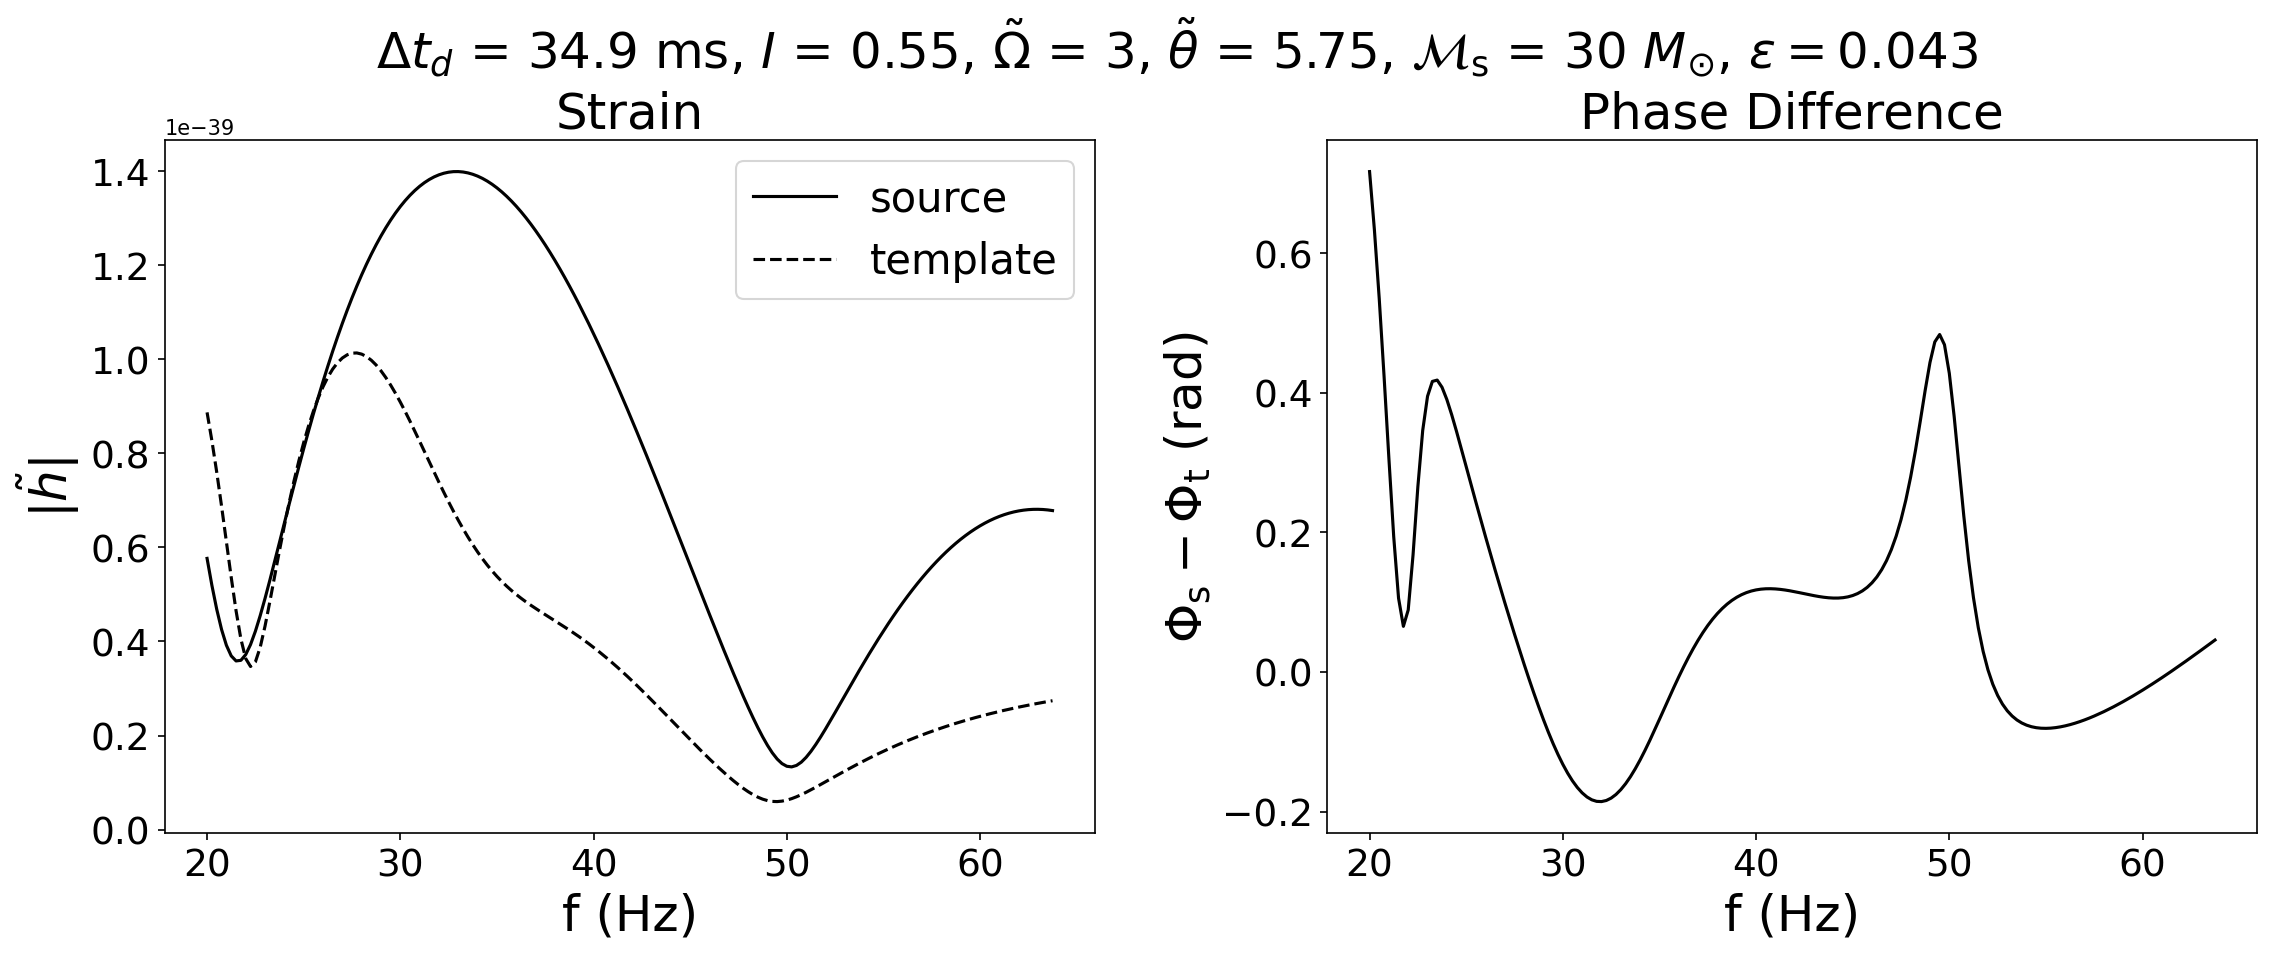

idx = 1.1071e-09, phi = -2.3493e-08, both should be ~0 if get_updated_mismatch_results is True


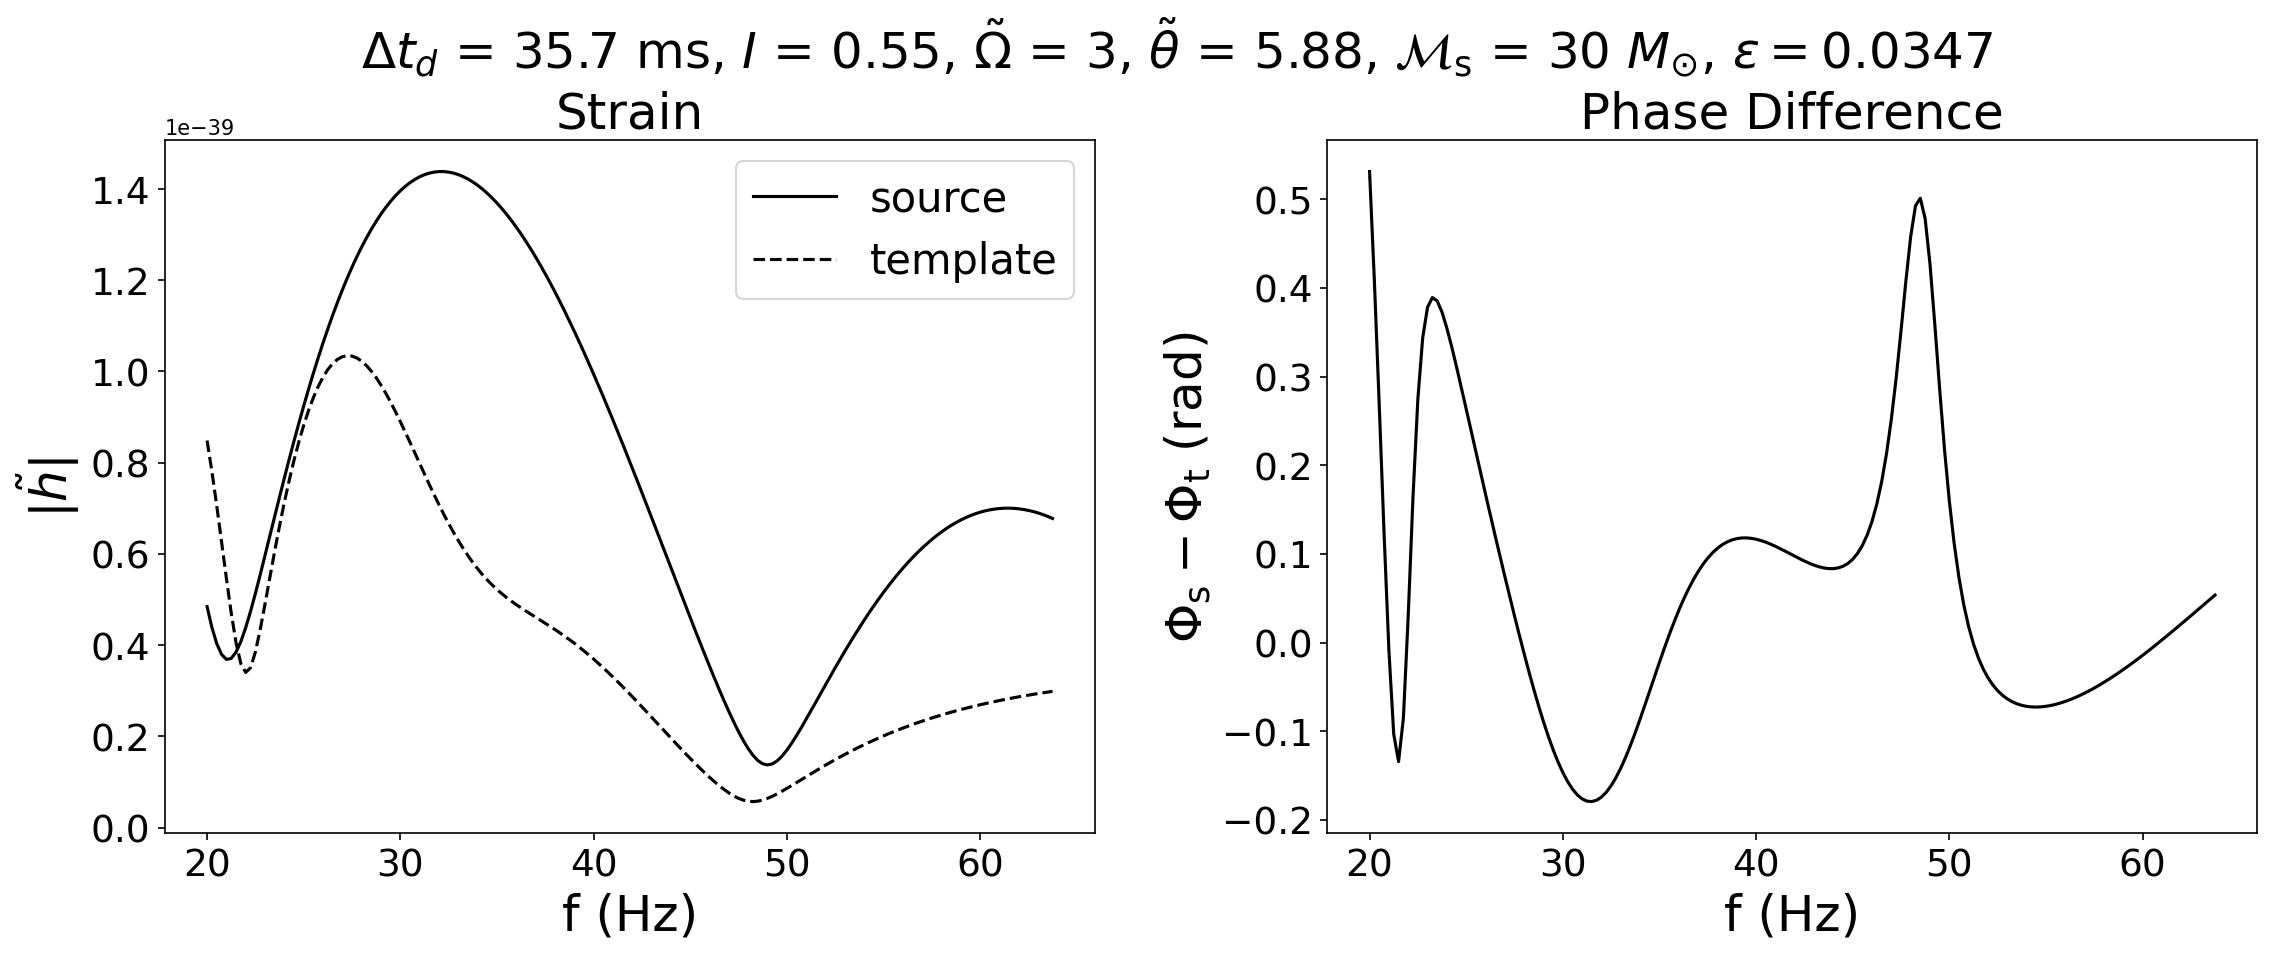

idx = 2.14509e-09, phi = -5.666e-09, both should be ~0 if get_updated_mismatch_results is True


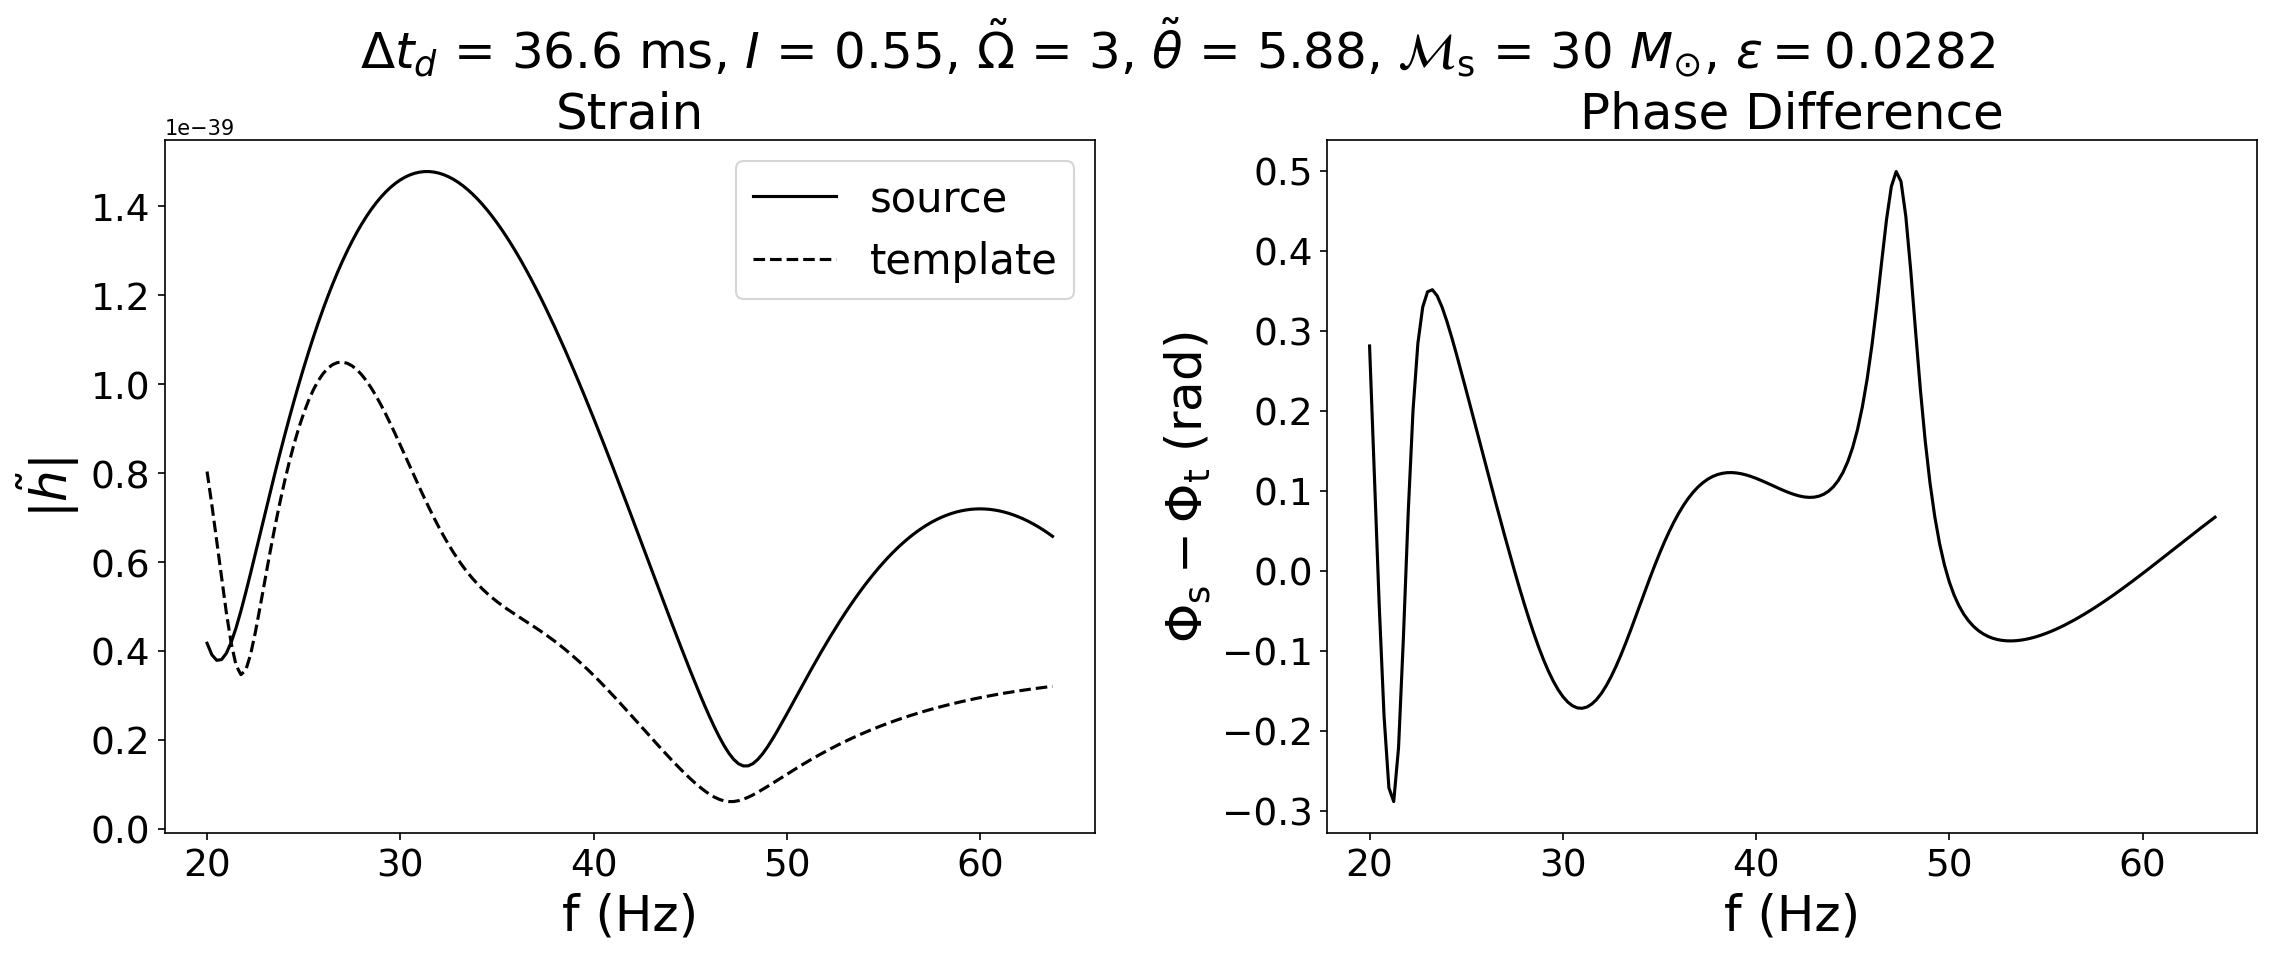

idx = -8.575e-09, phi = -6.99913e-09, both should be ~0 if get_updated_mismatch_results is True


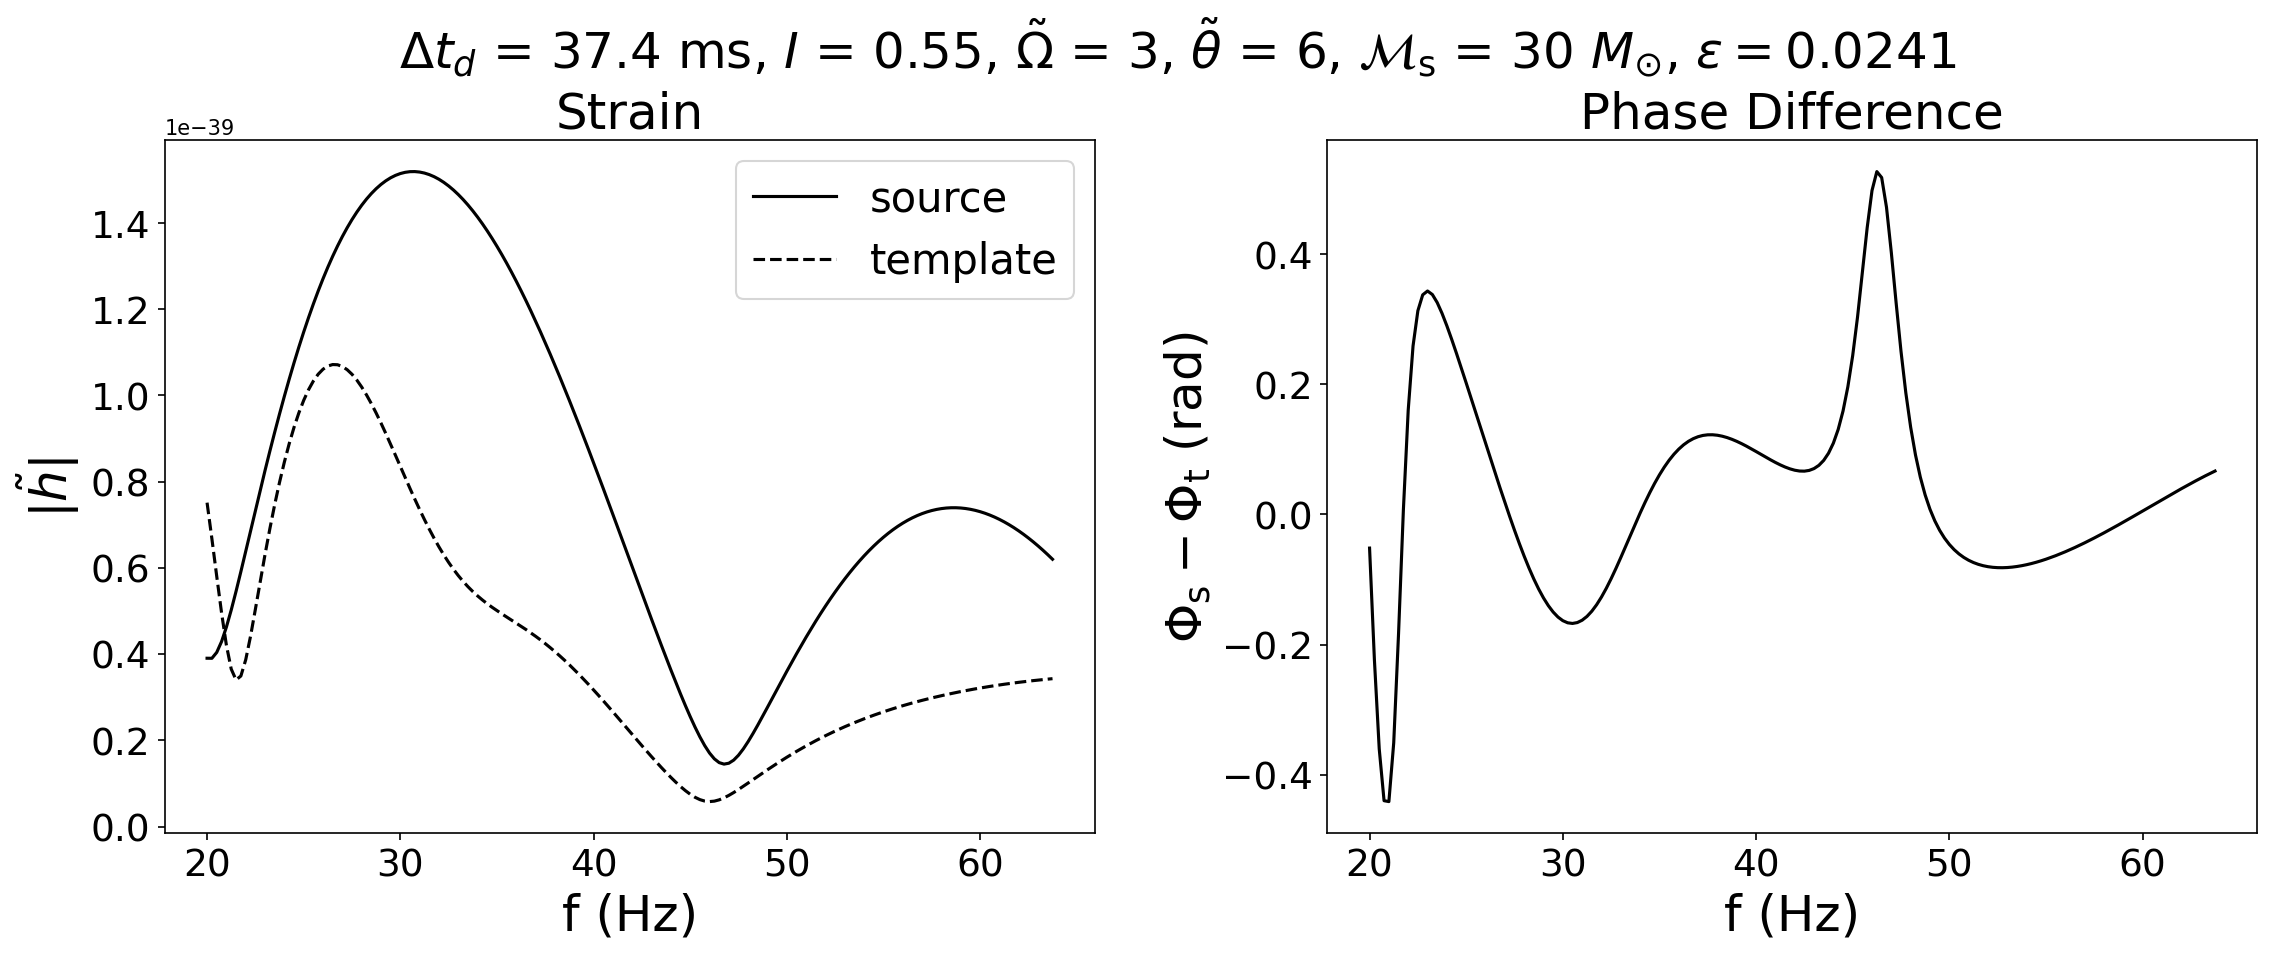

idx = 1.22292e-08, phi = -2.4137e-08, both should be ~0 if get_updated_mismatch_results is True


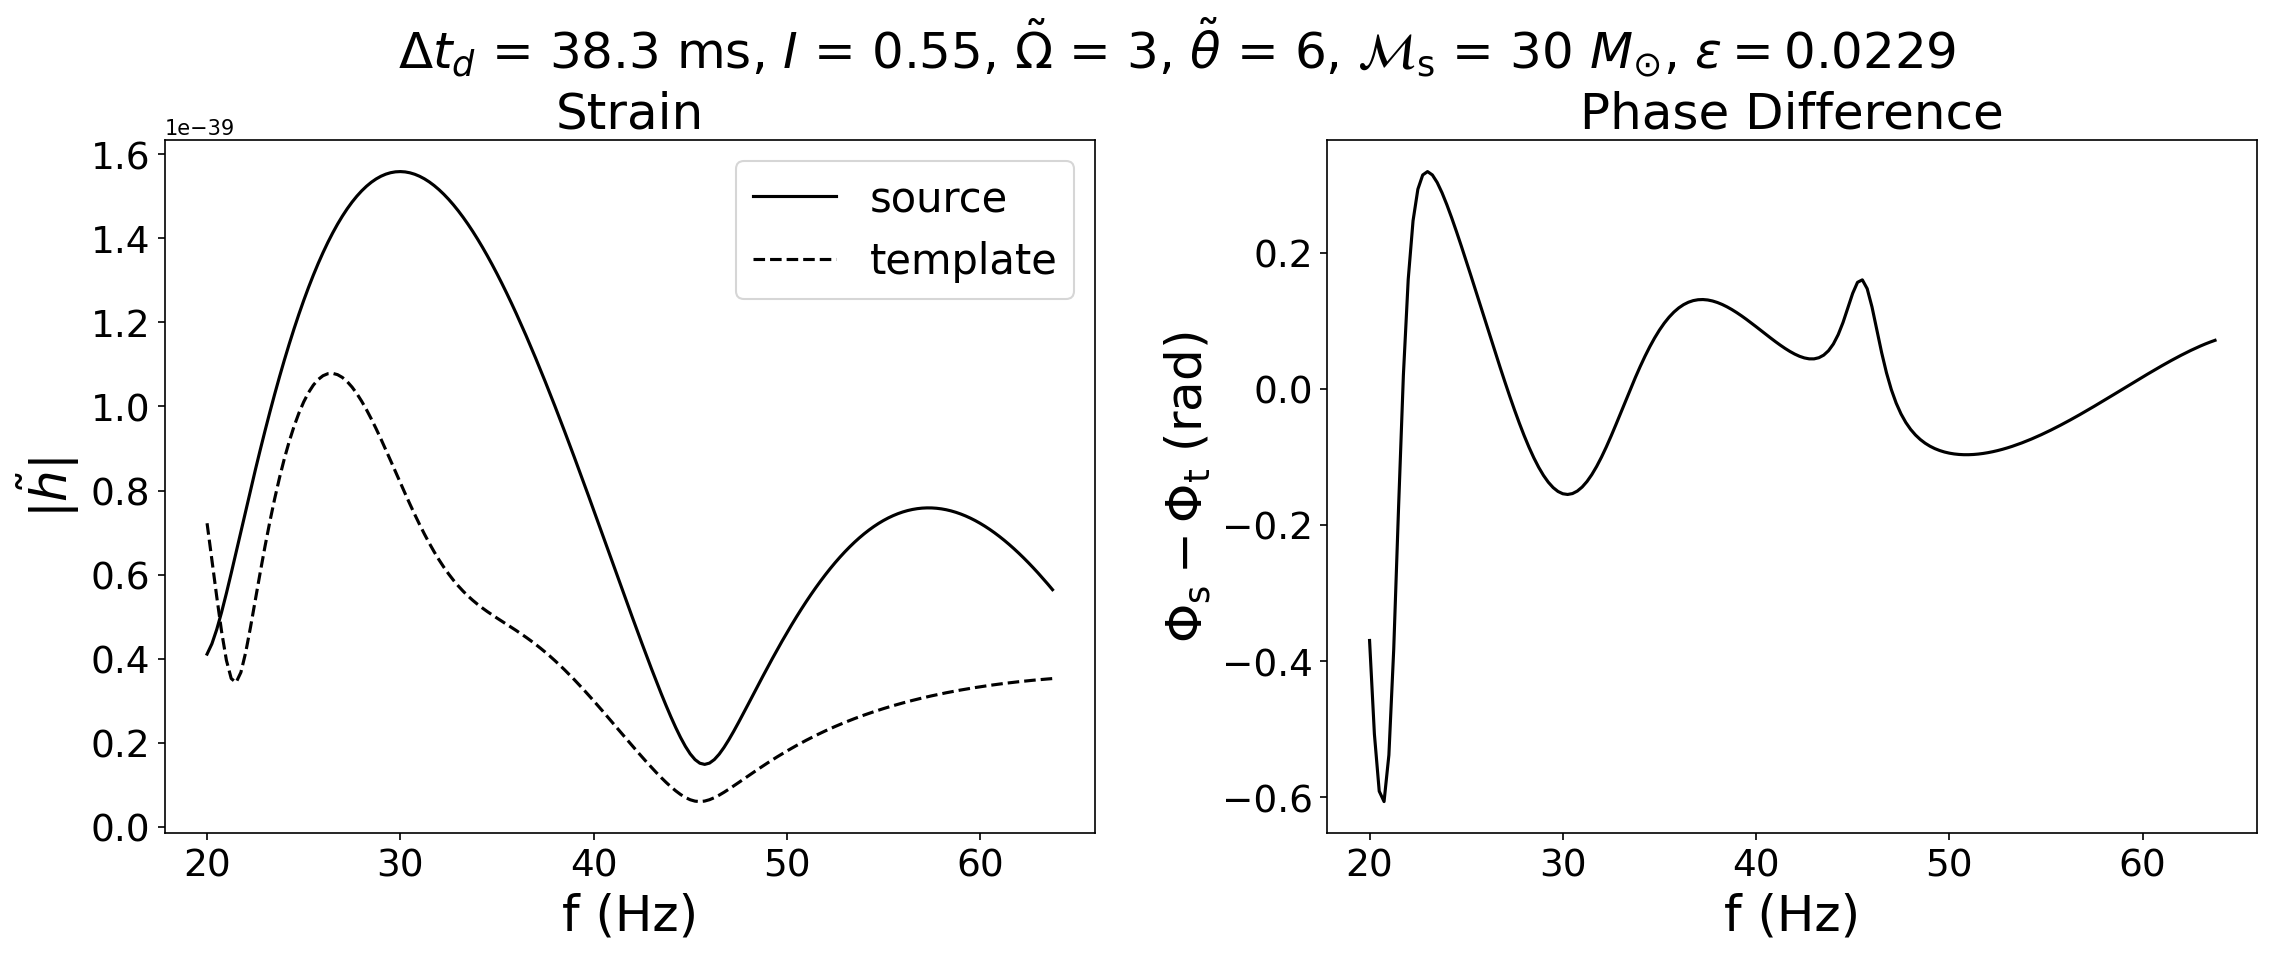

idx = -2.04111e-08, phi = 2.34348e-08, both should be ~0 if get_updated_mismatch_results is True


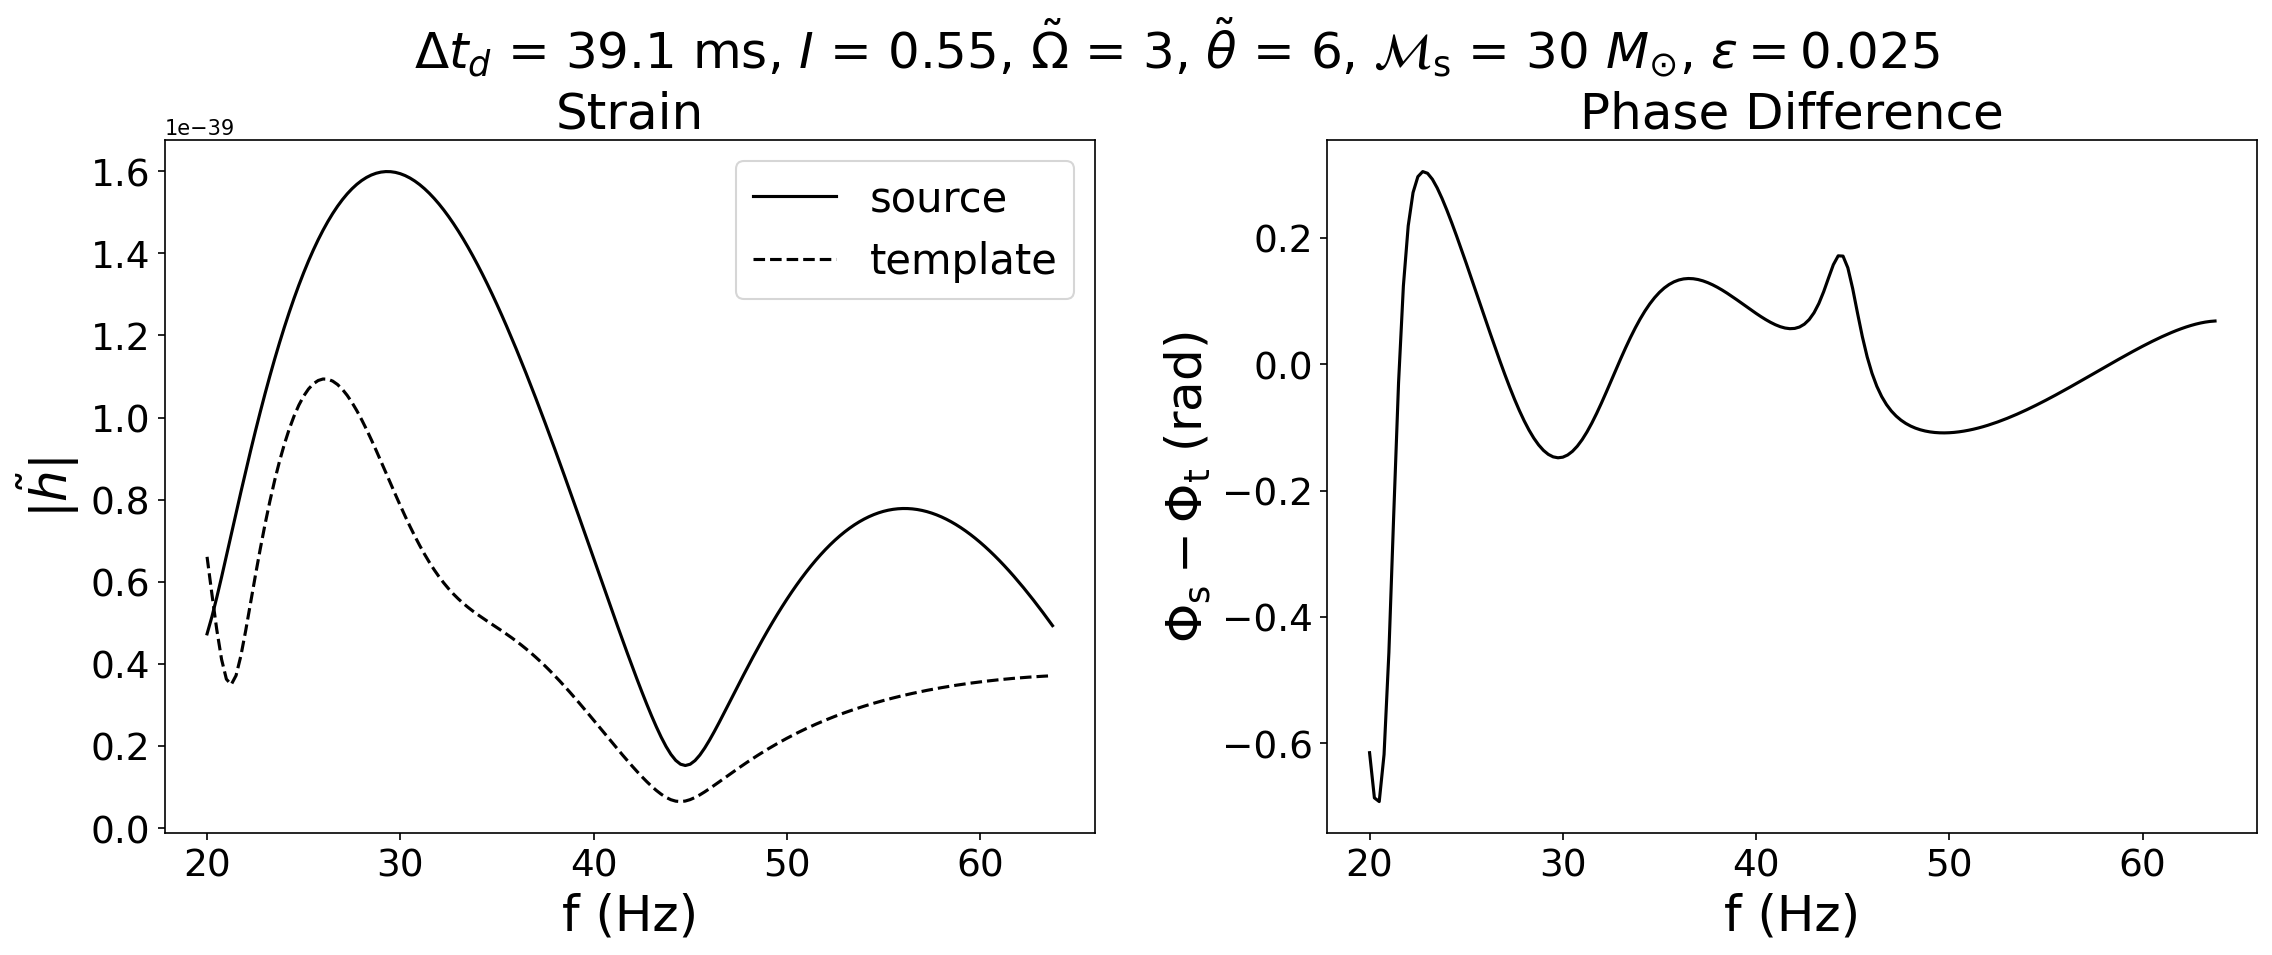

idx = 8.17184e-09, phi = 1.94864e-09, both should be ~0 if get_updated_mismatch_results is True


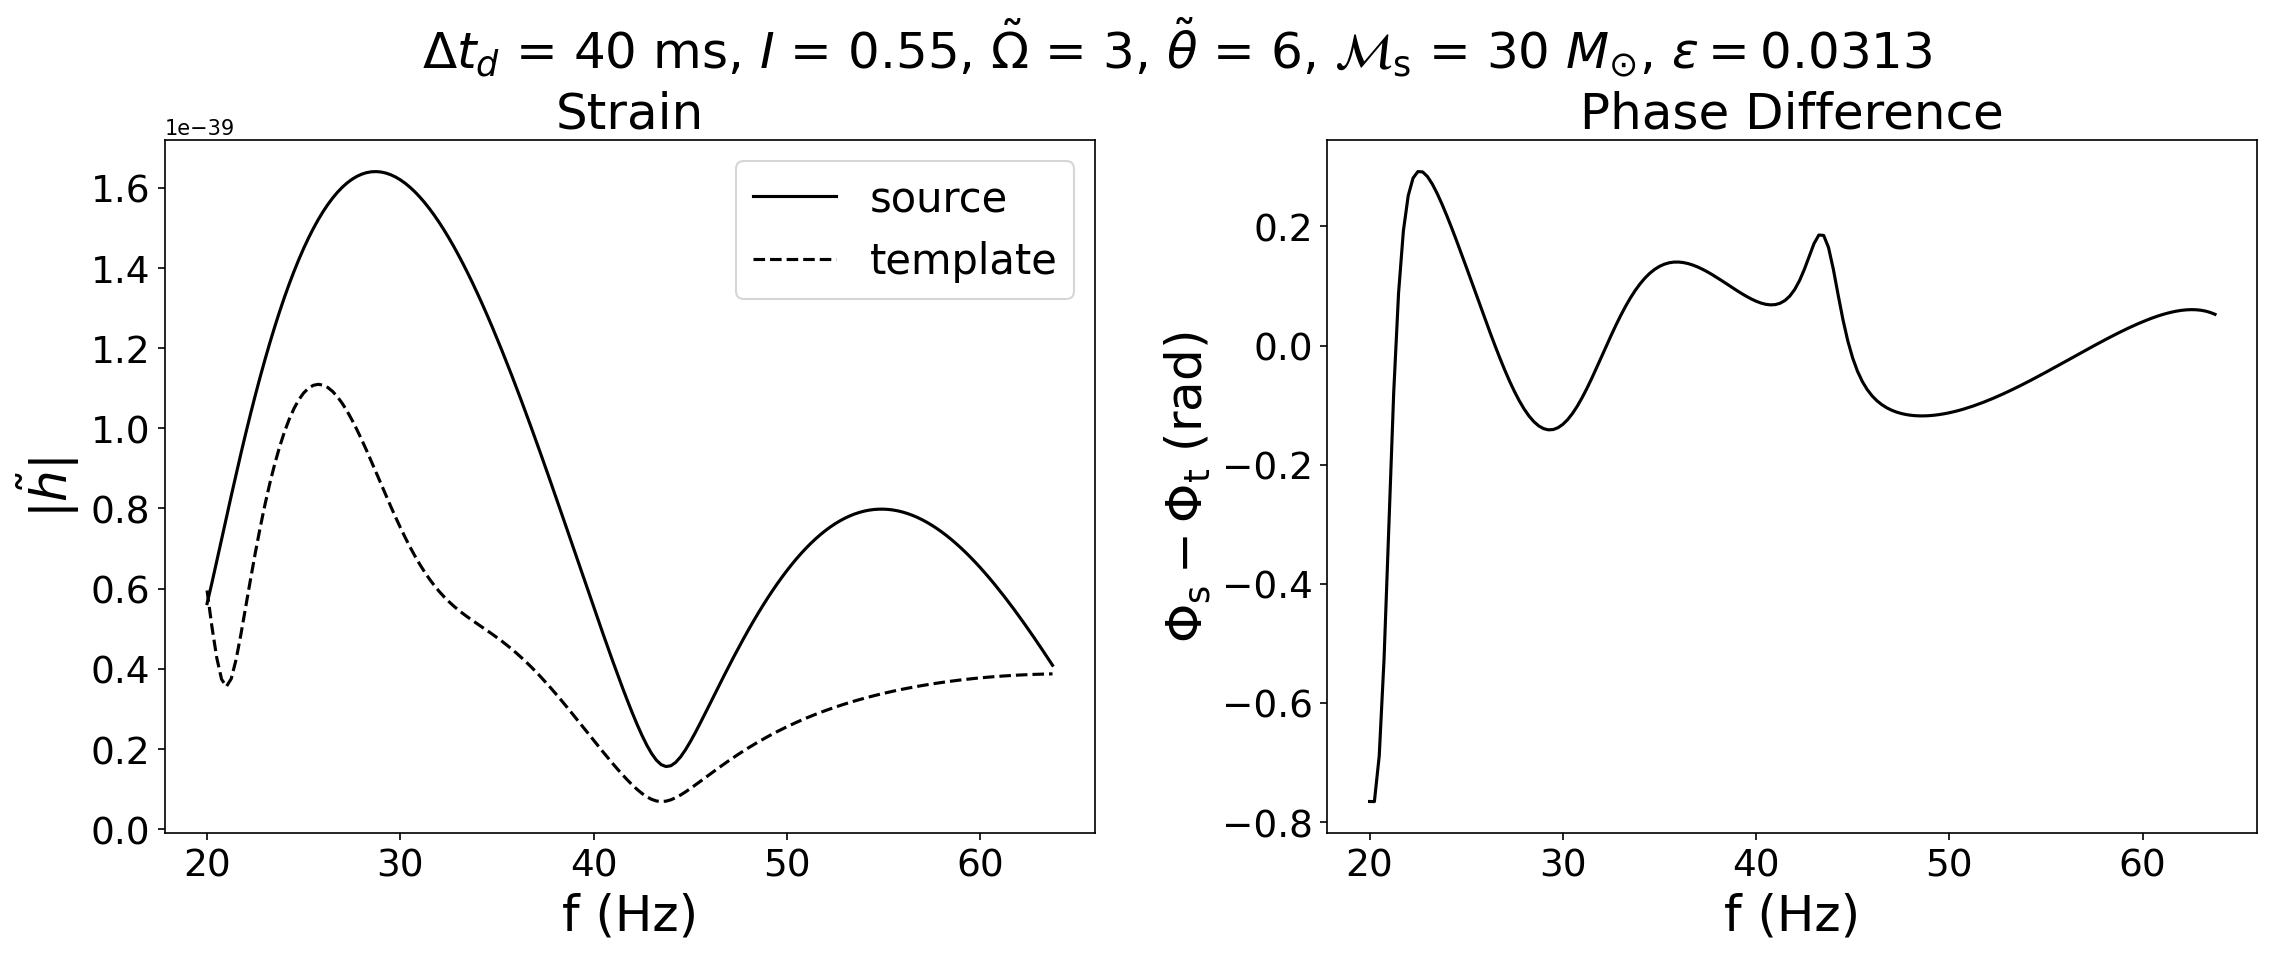

idx = 2.71558e-08, phi = -2.22913e-08, both should be ~0 if get_updated_mismatch_results is True


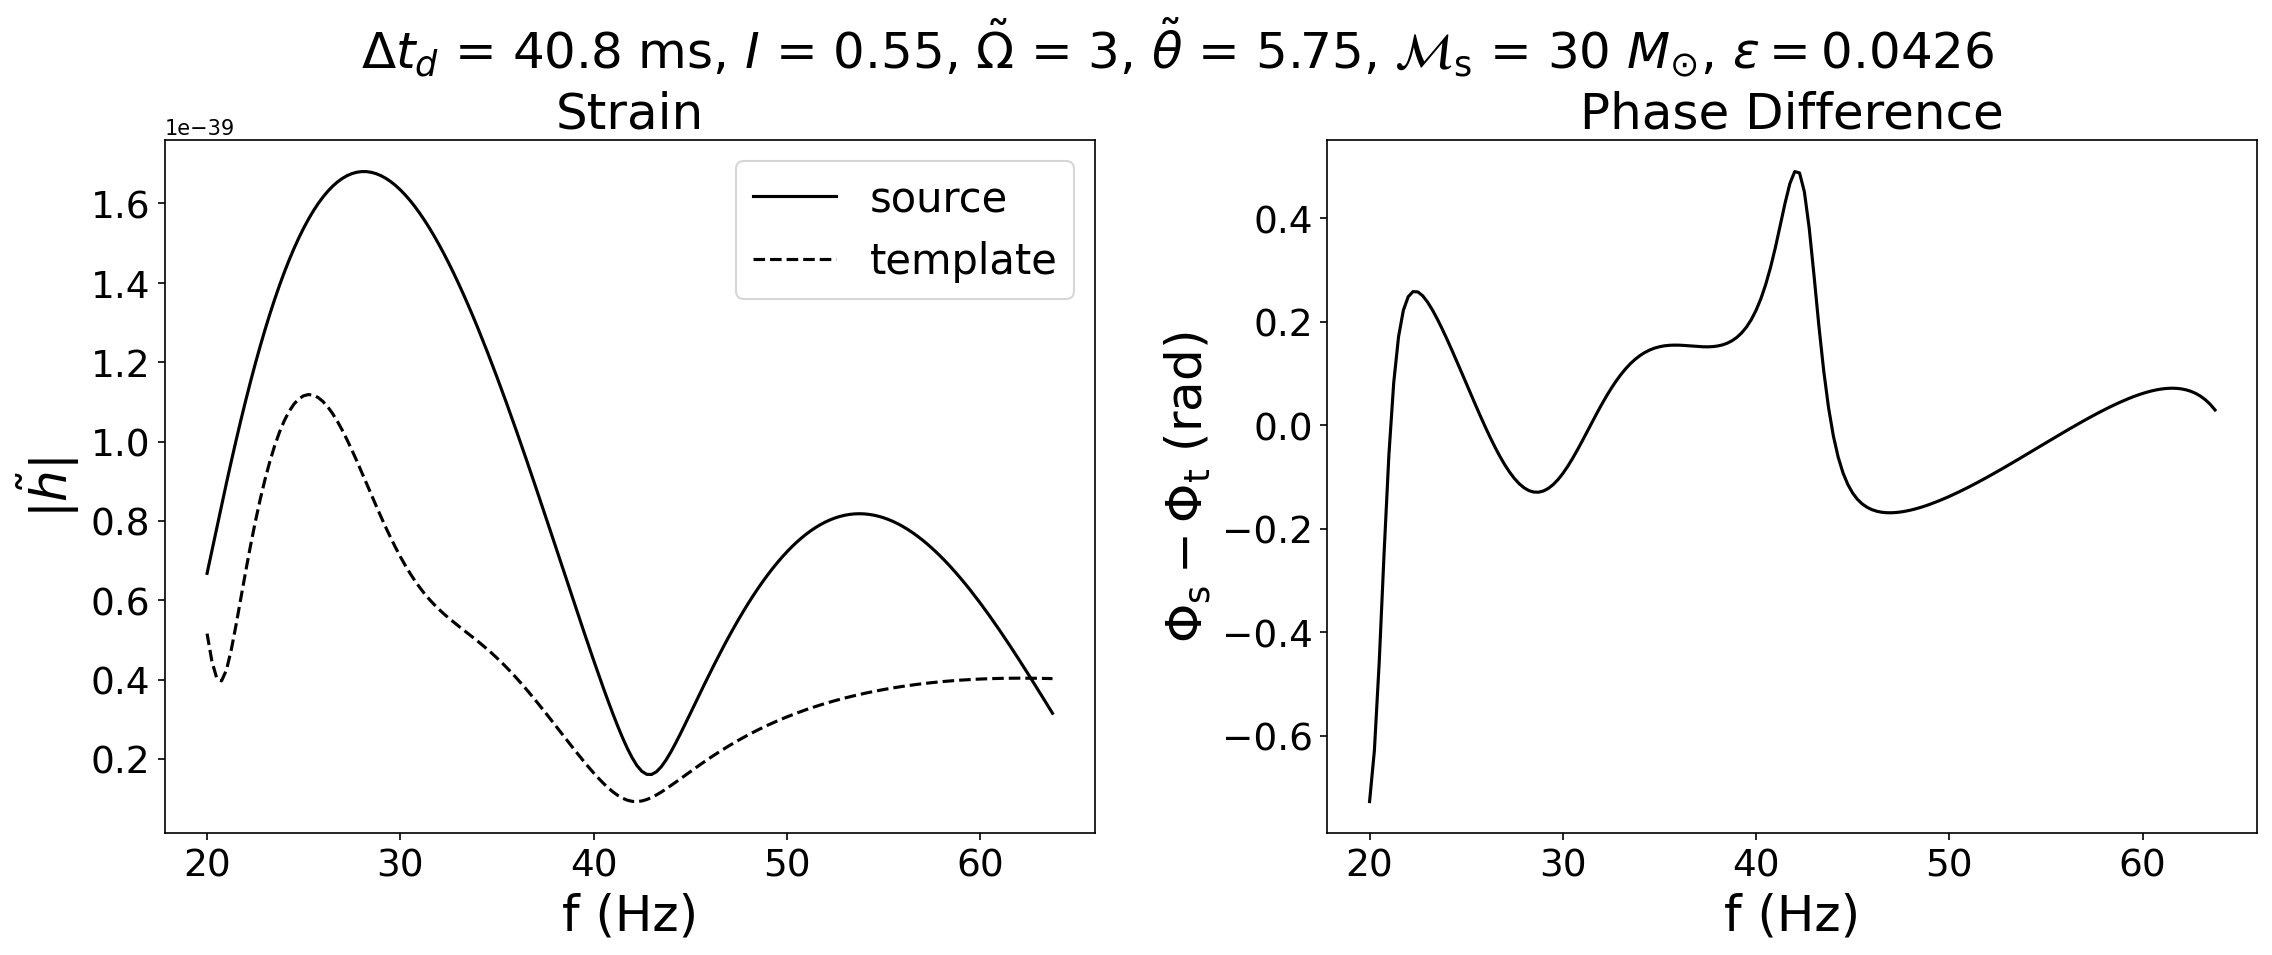

idx = -1.69953e-08, phi = 5.76013e-08, both should be ~0 if get_updated_mismatch_results is True


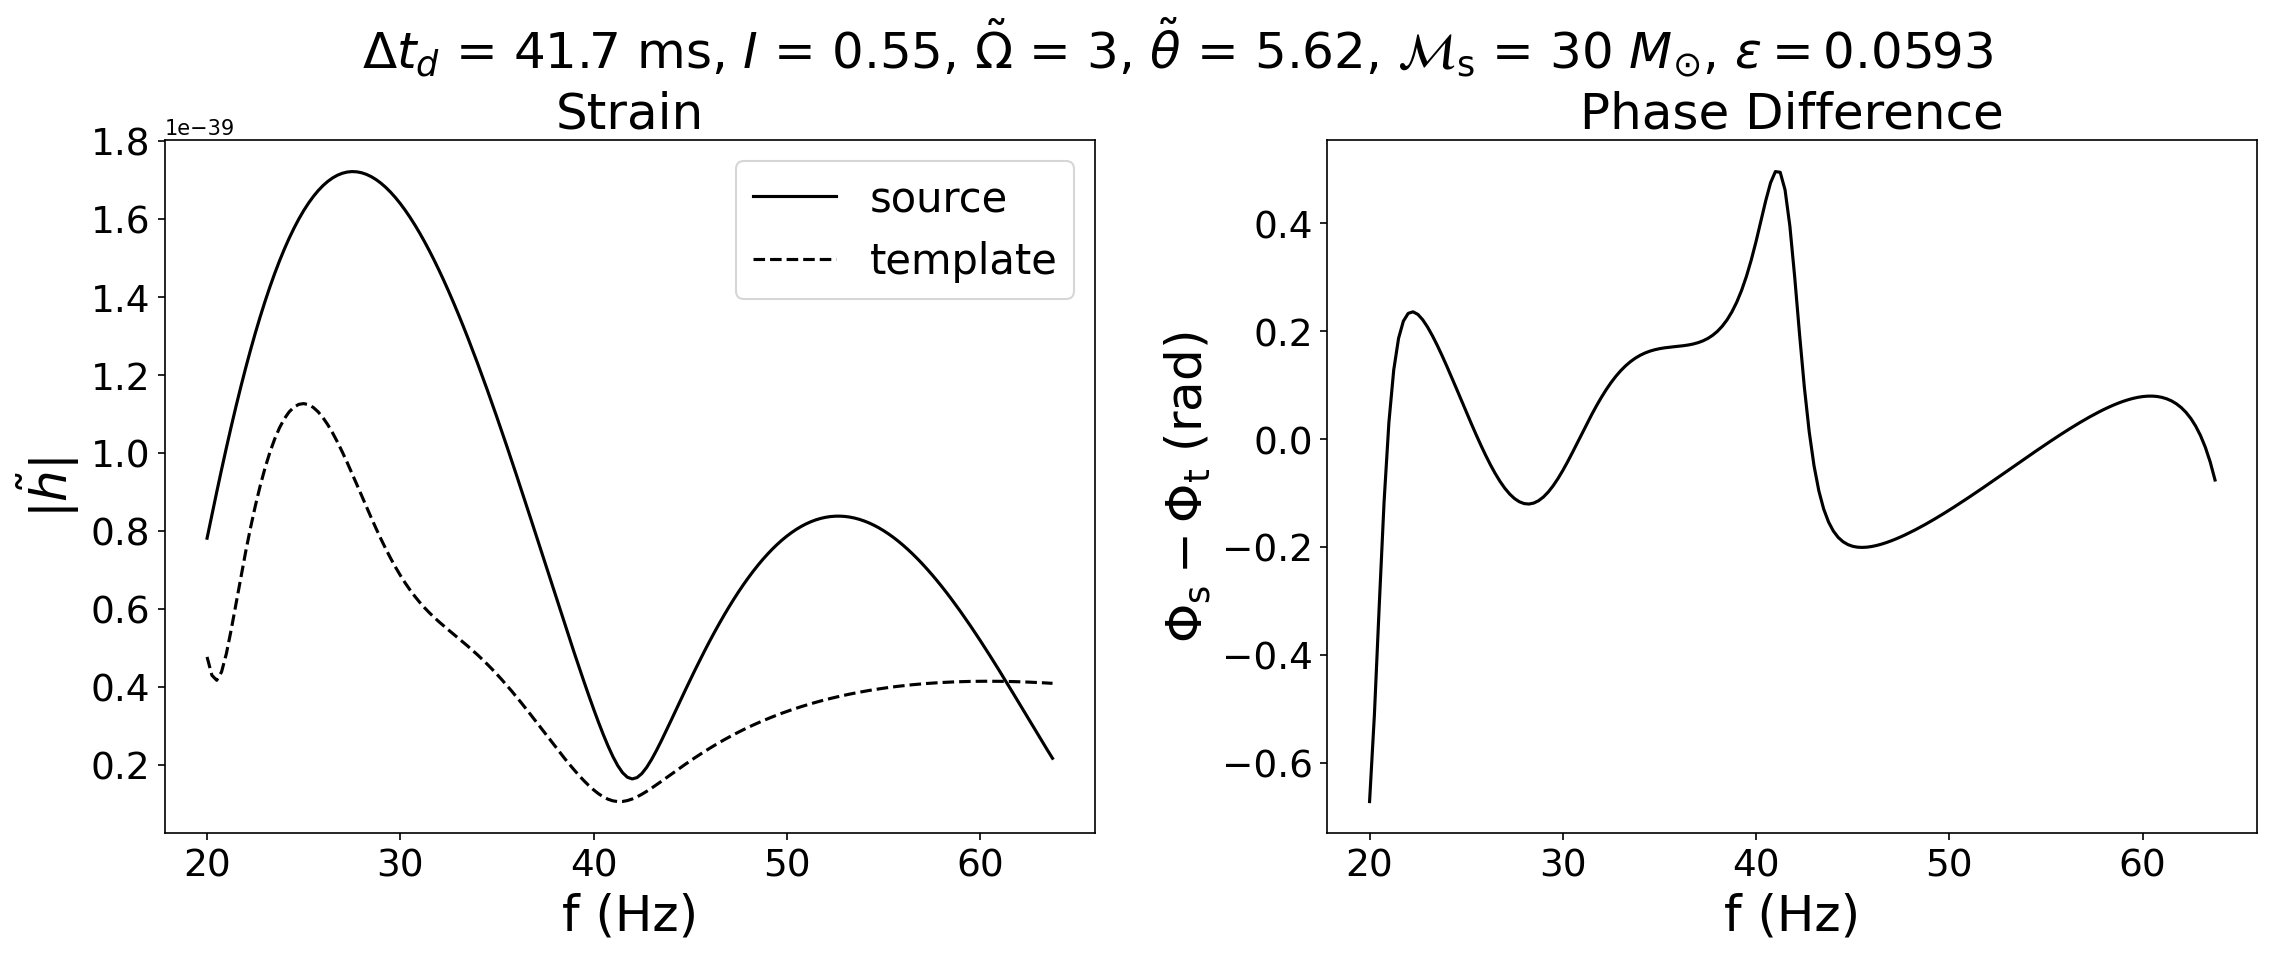

idx = -1.55312e-09, phi = 2.87845e-08, both should be ~0 if get_updated_mismatch_results is True


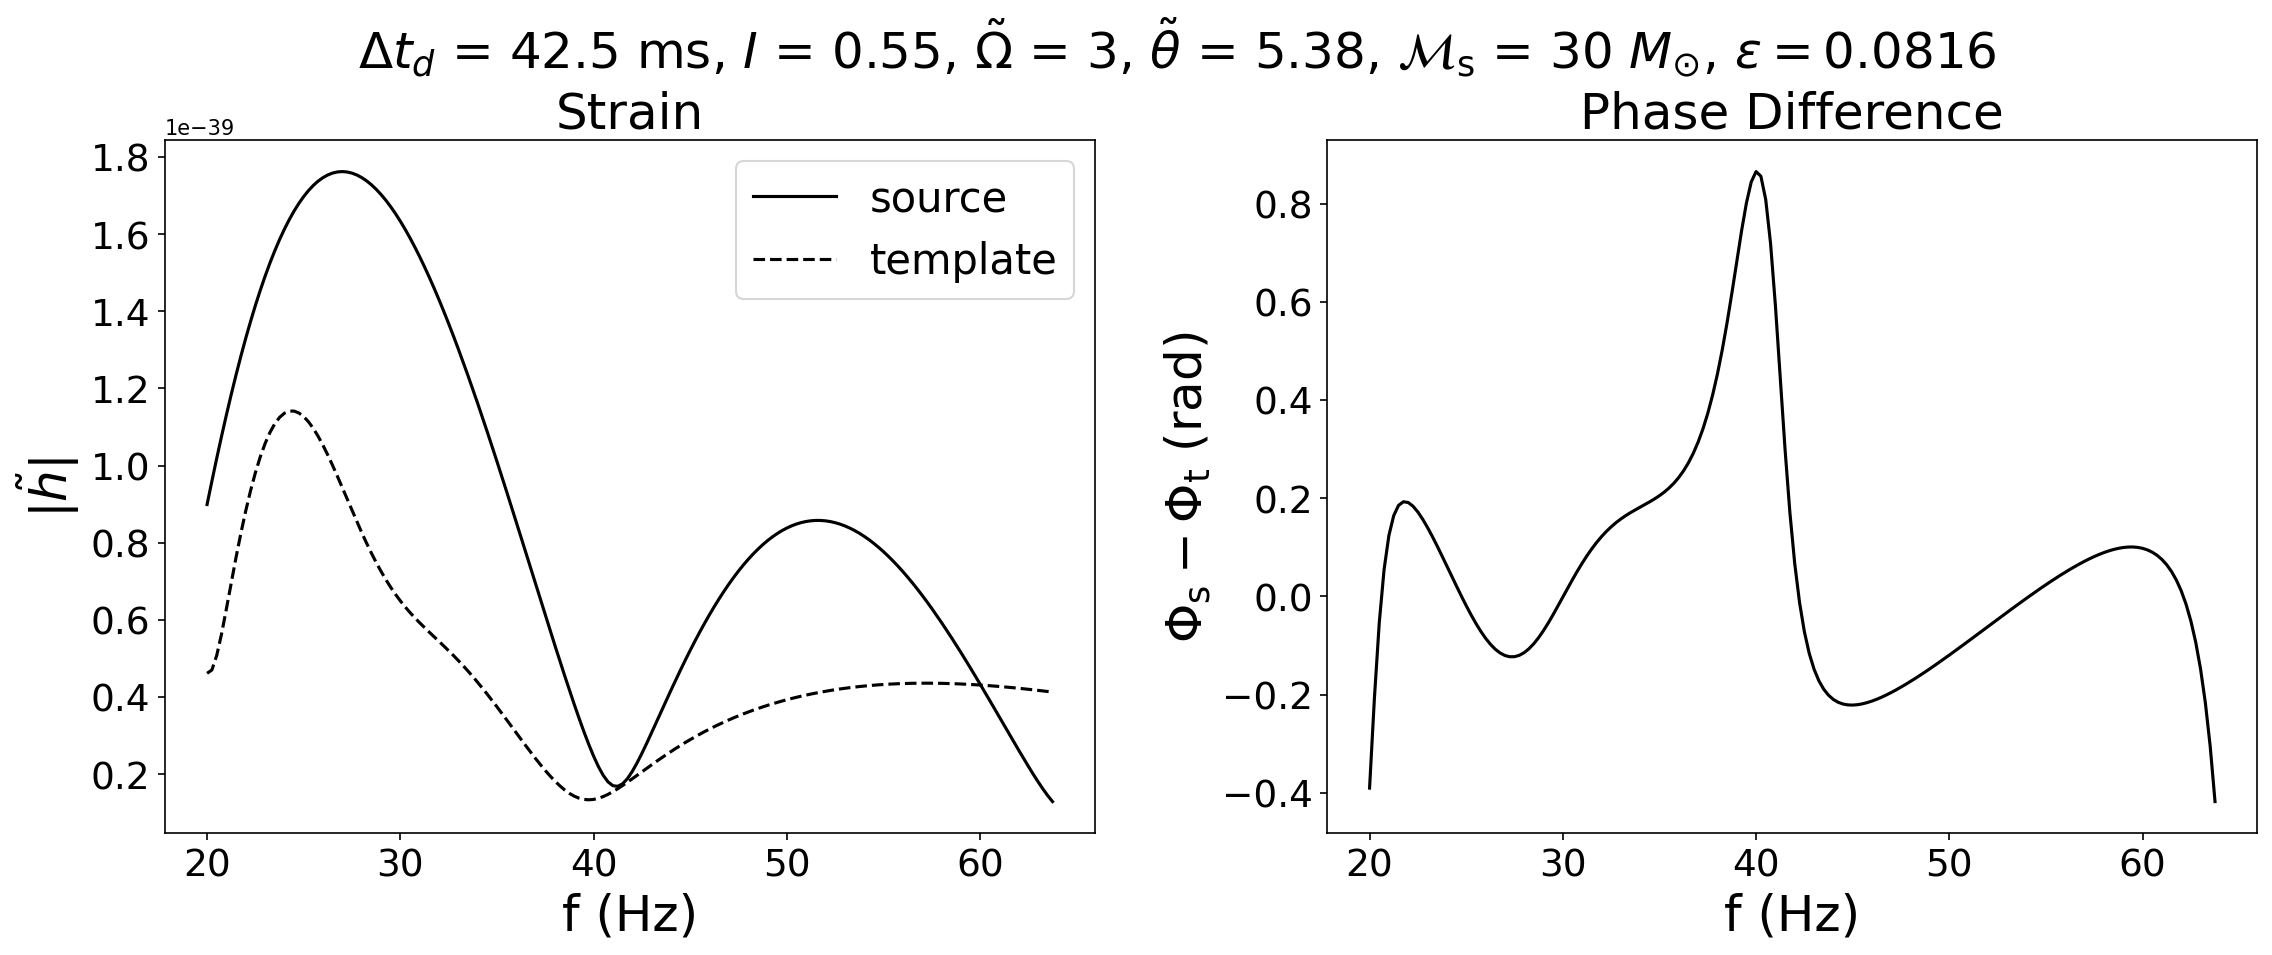

idx = -7.5712e-10, phi = 8.73441e-11, both should be ~0 if get_updated_mismatch_results is True


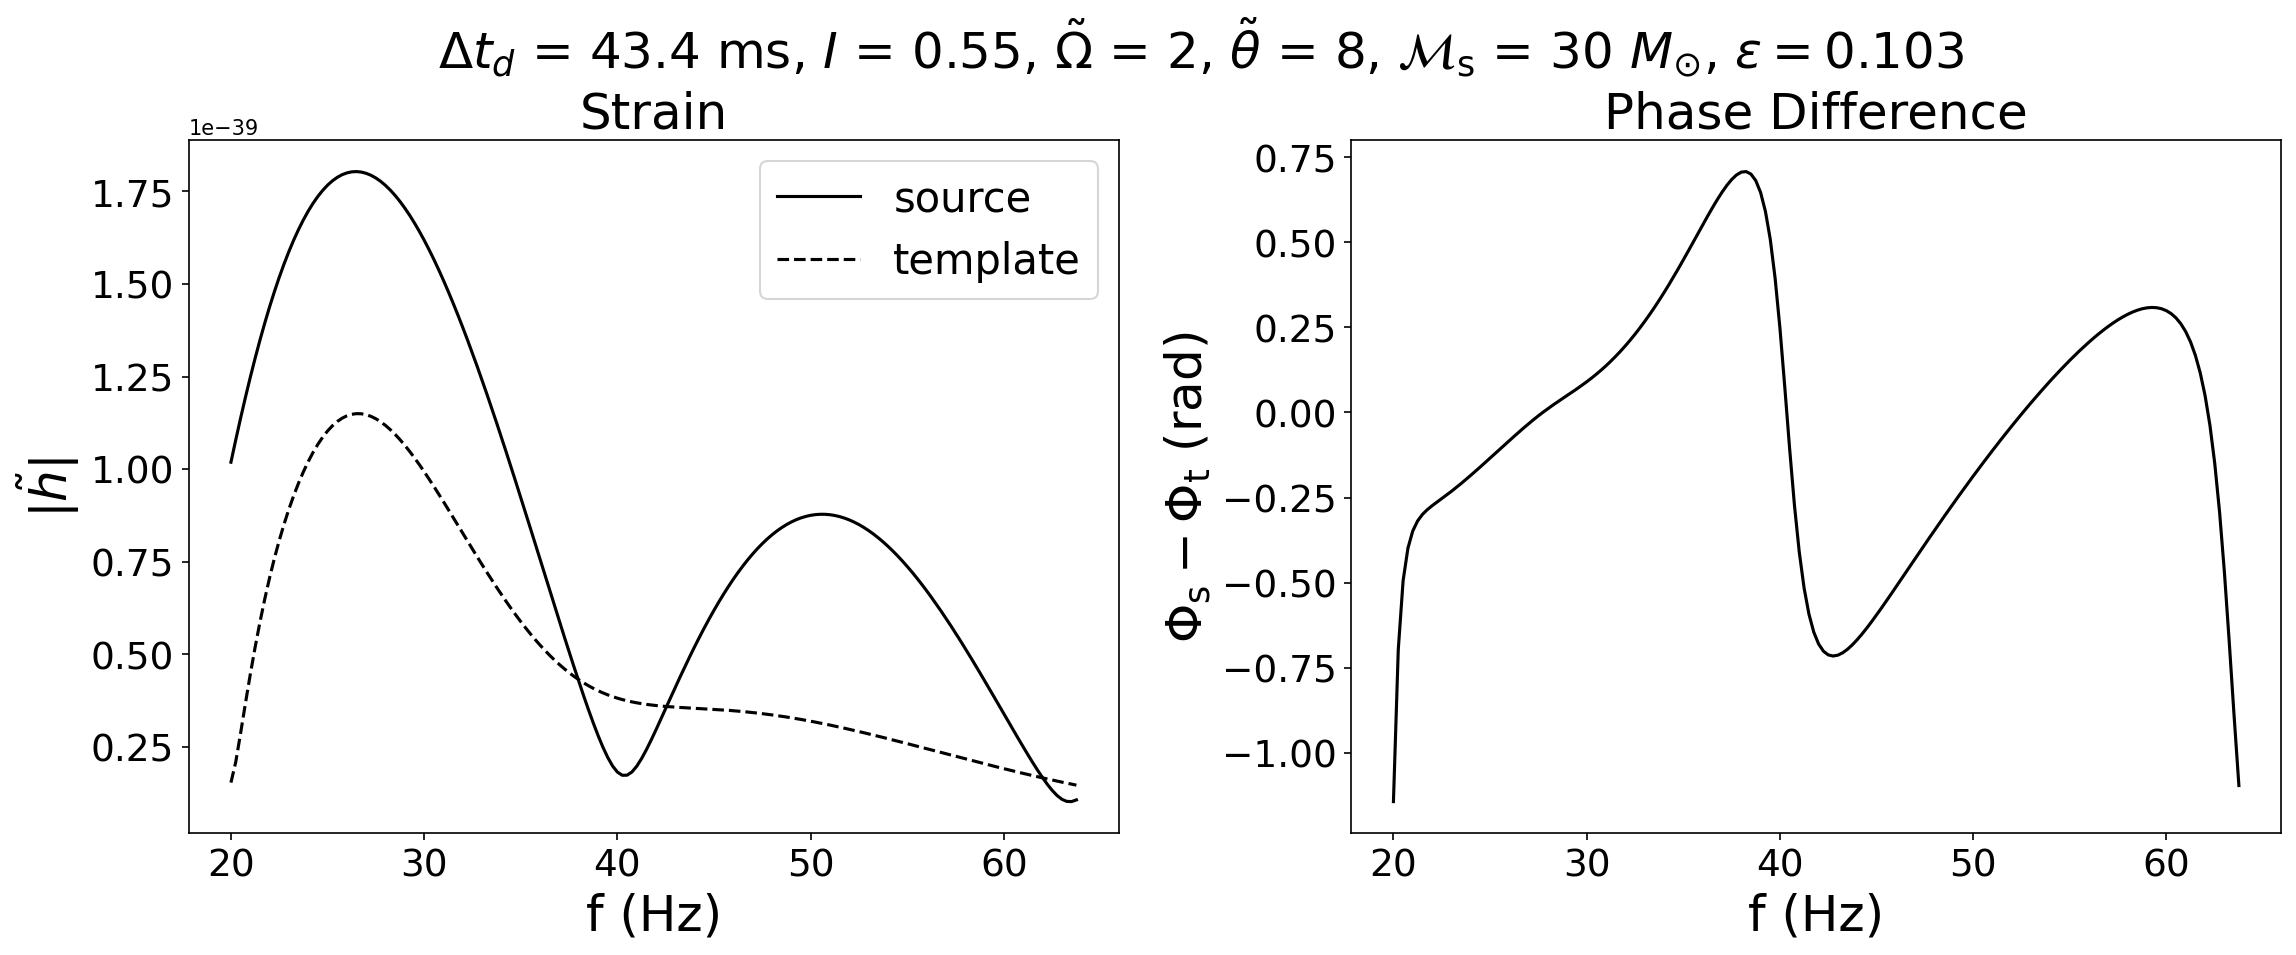

idx = 2.19005e-08, phi = -1.41614e-08, both should be ~0 if get_updated_mismatch_results is True


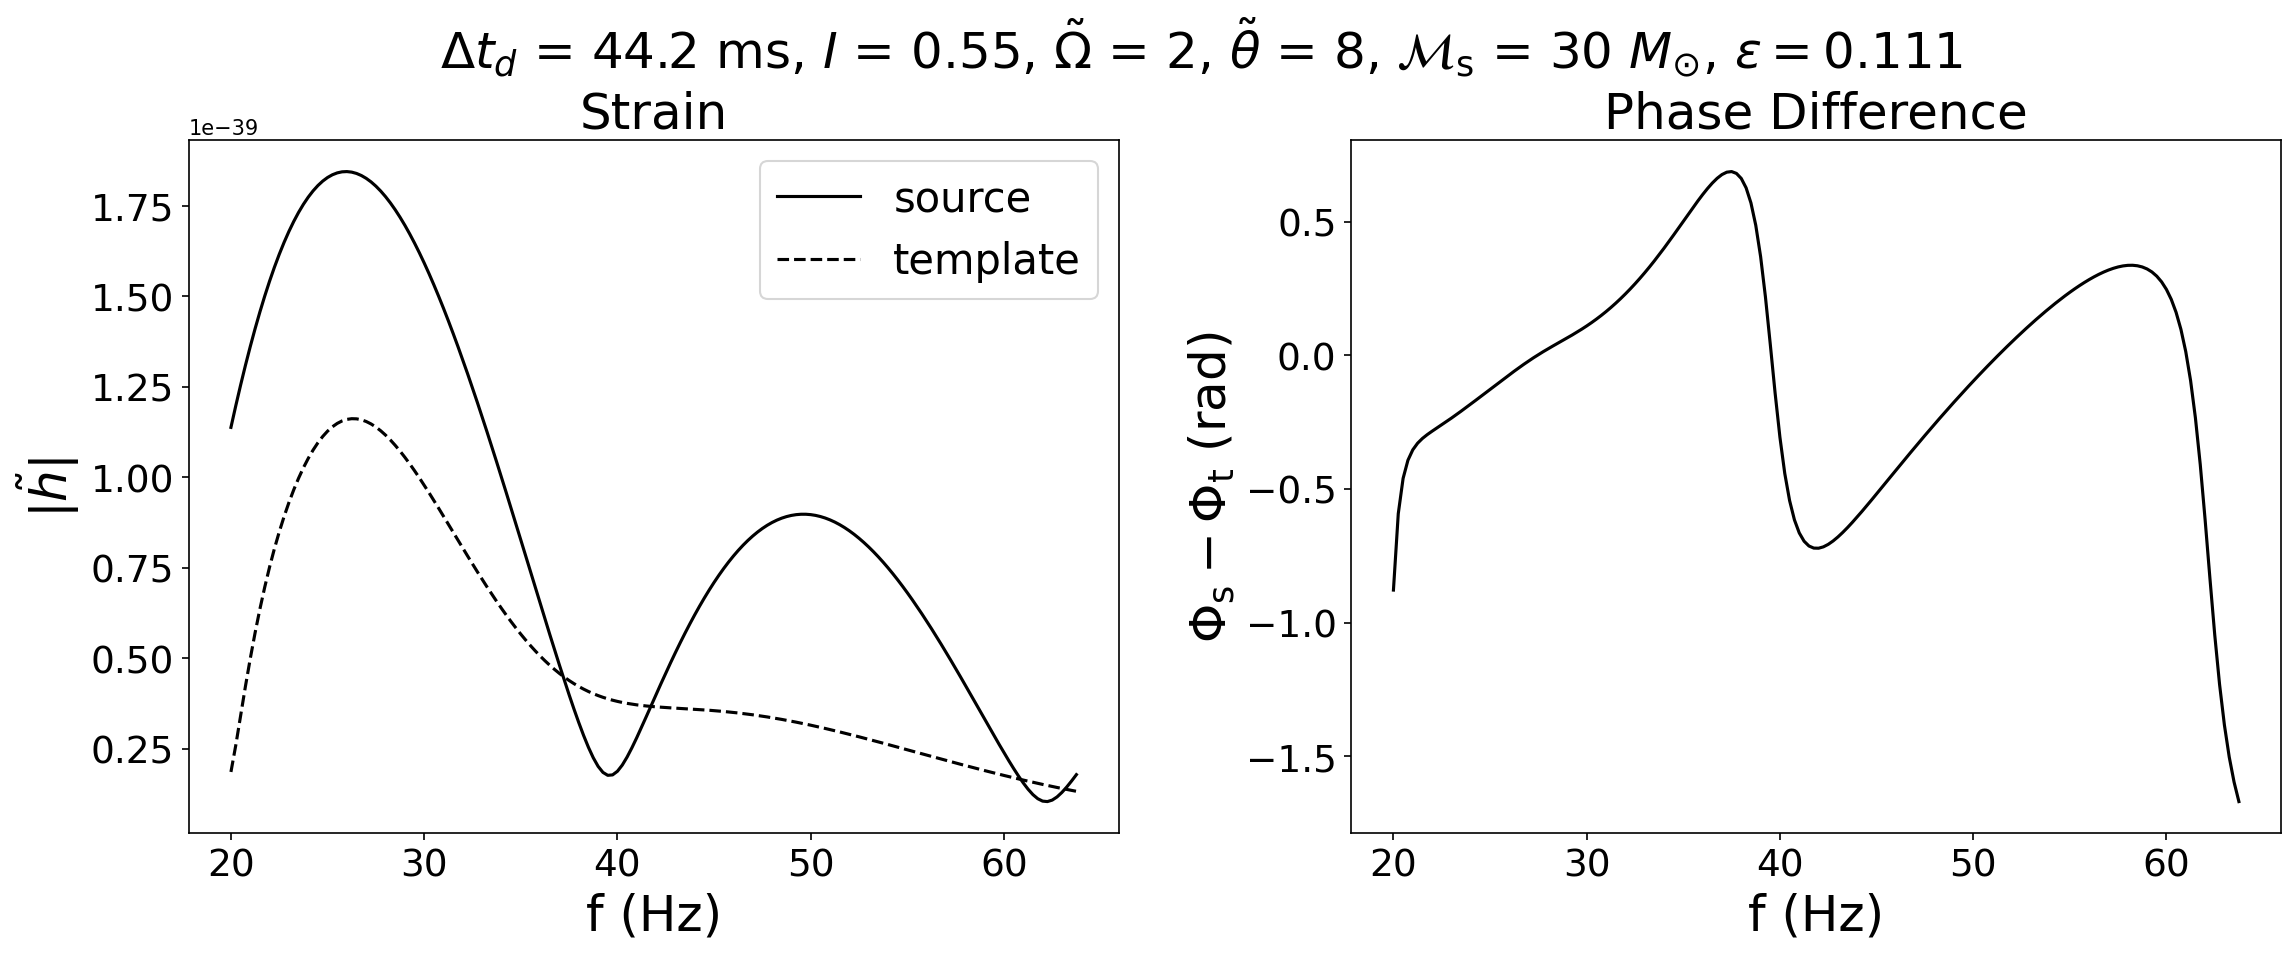

In [10]:
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = data_td["MLz_arr"]
td_arr = data_td["td_arr"]

for i in range(0, len(MLz_arr), 5):
    if td_arr[i] < 0.030 or td_arr[i] > 0.045:
        continue
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

idx = -1.3116e-09, phi = 2.80711e-09, both should be ~0 if get_updated_mismatch_results is True


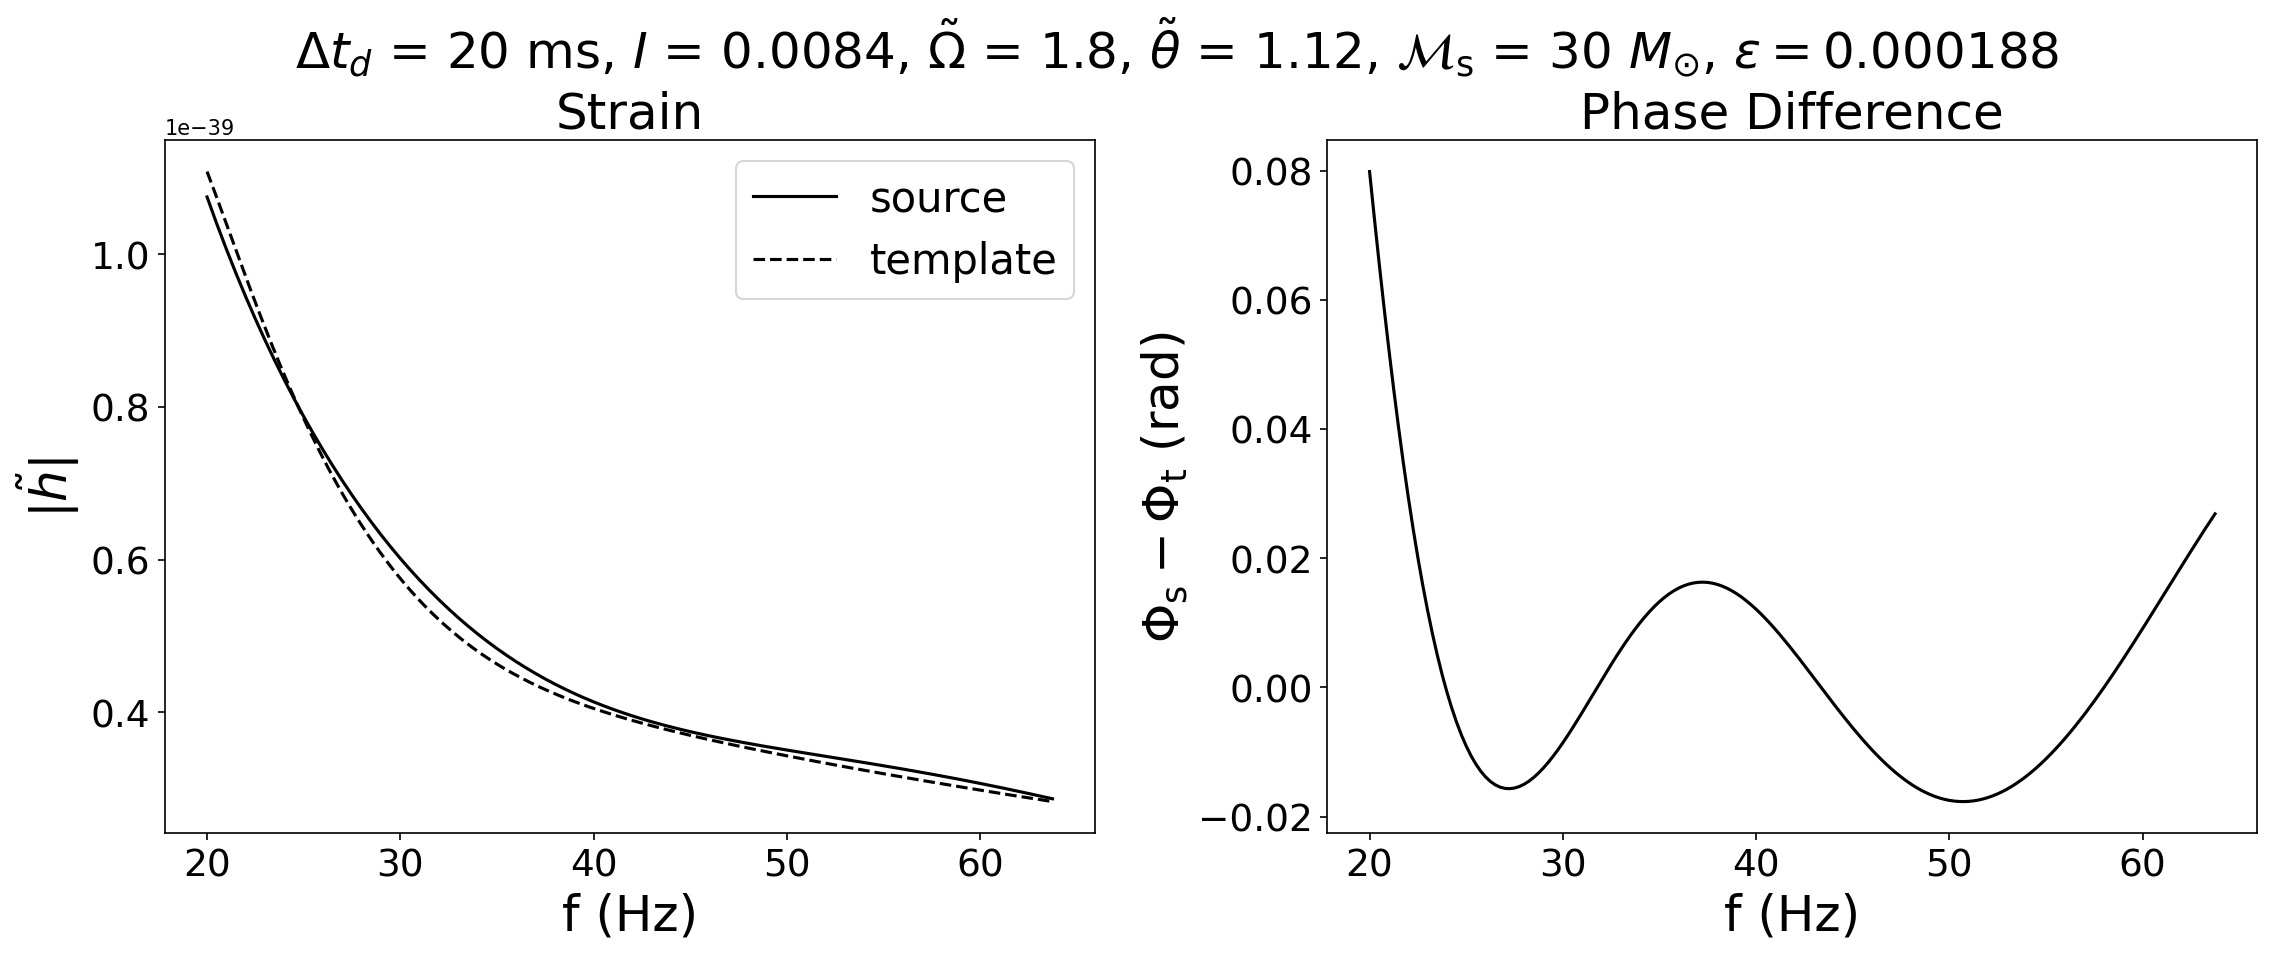

idx = -9.48294e-10, phi = 9.57755e-09, both should be ~0 if get_updated_mismatch_results is True


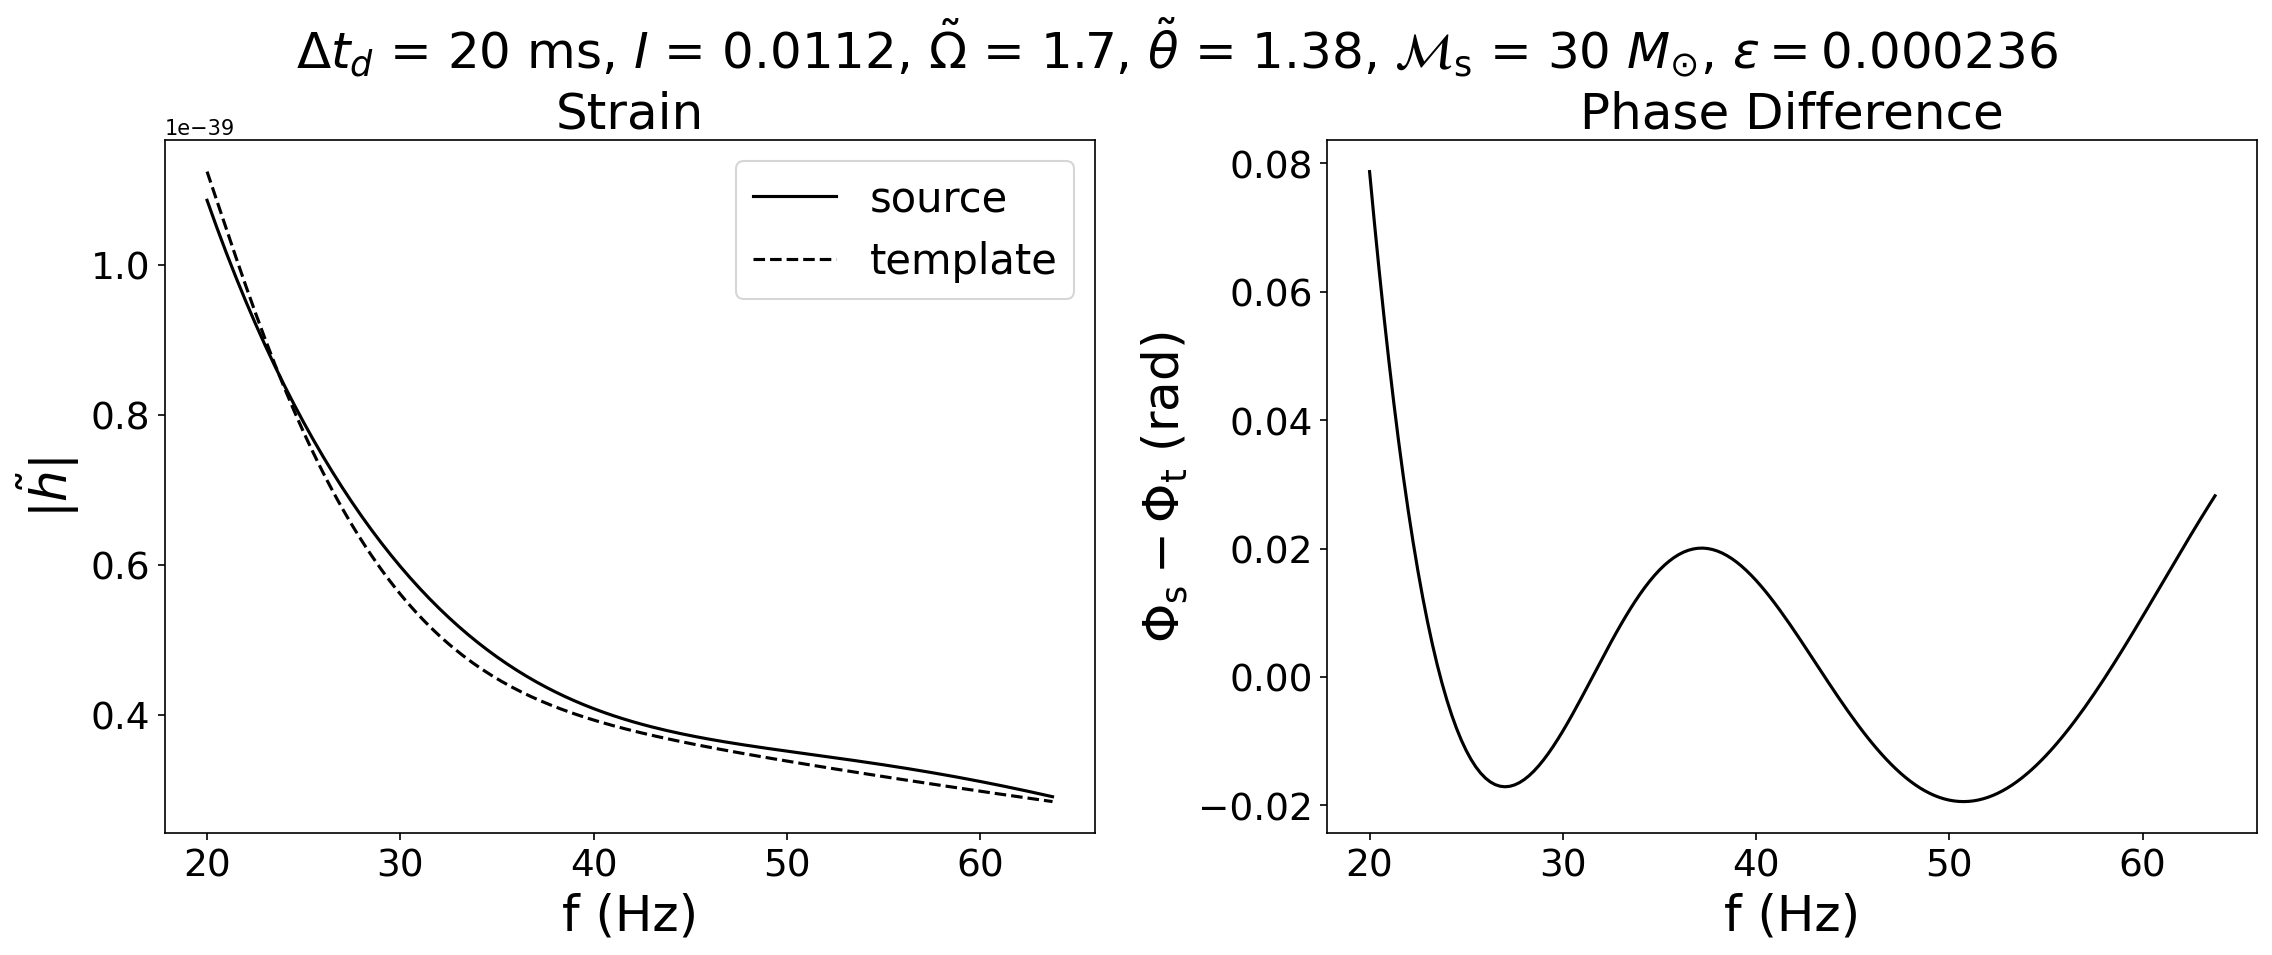

idx = -1.64741e-08, phi = 8.19925e-09, both should be ~0 if get_updated_mismatch_results is True


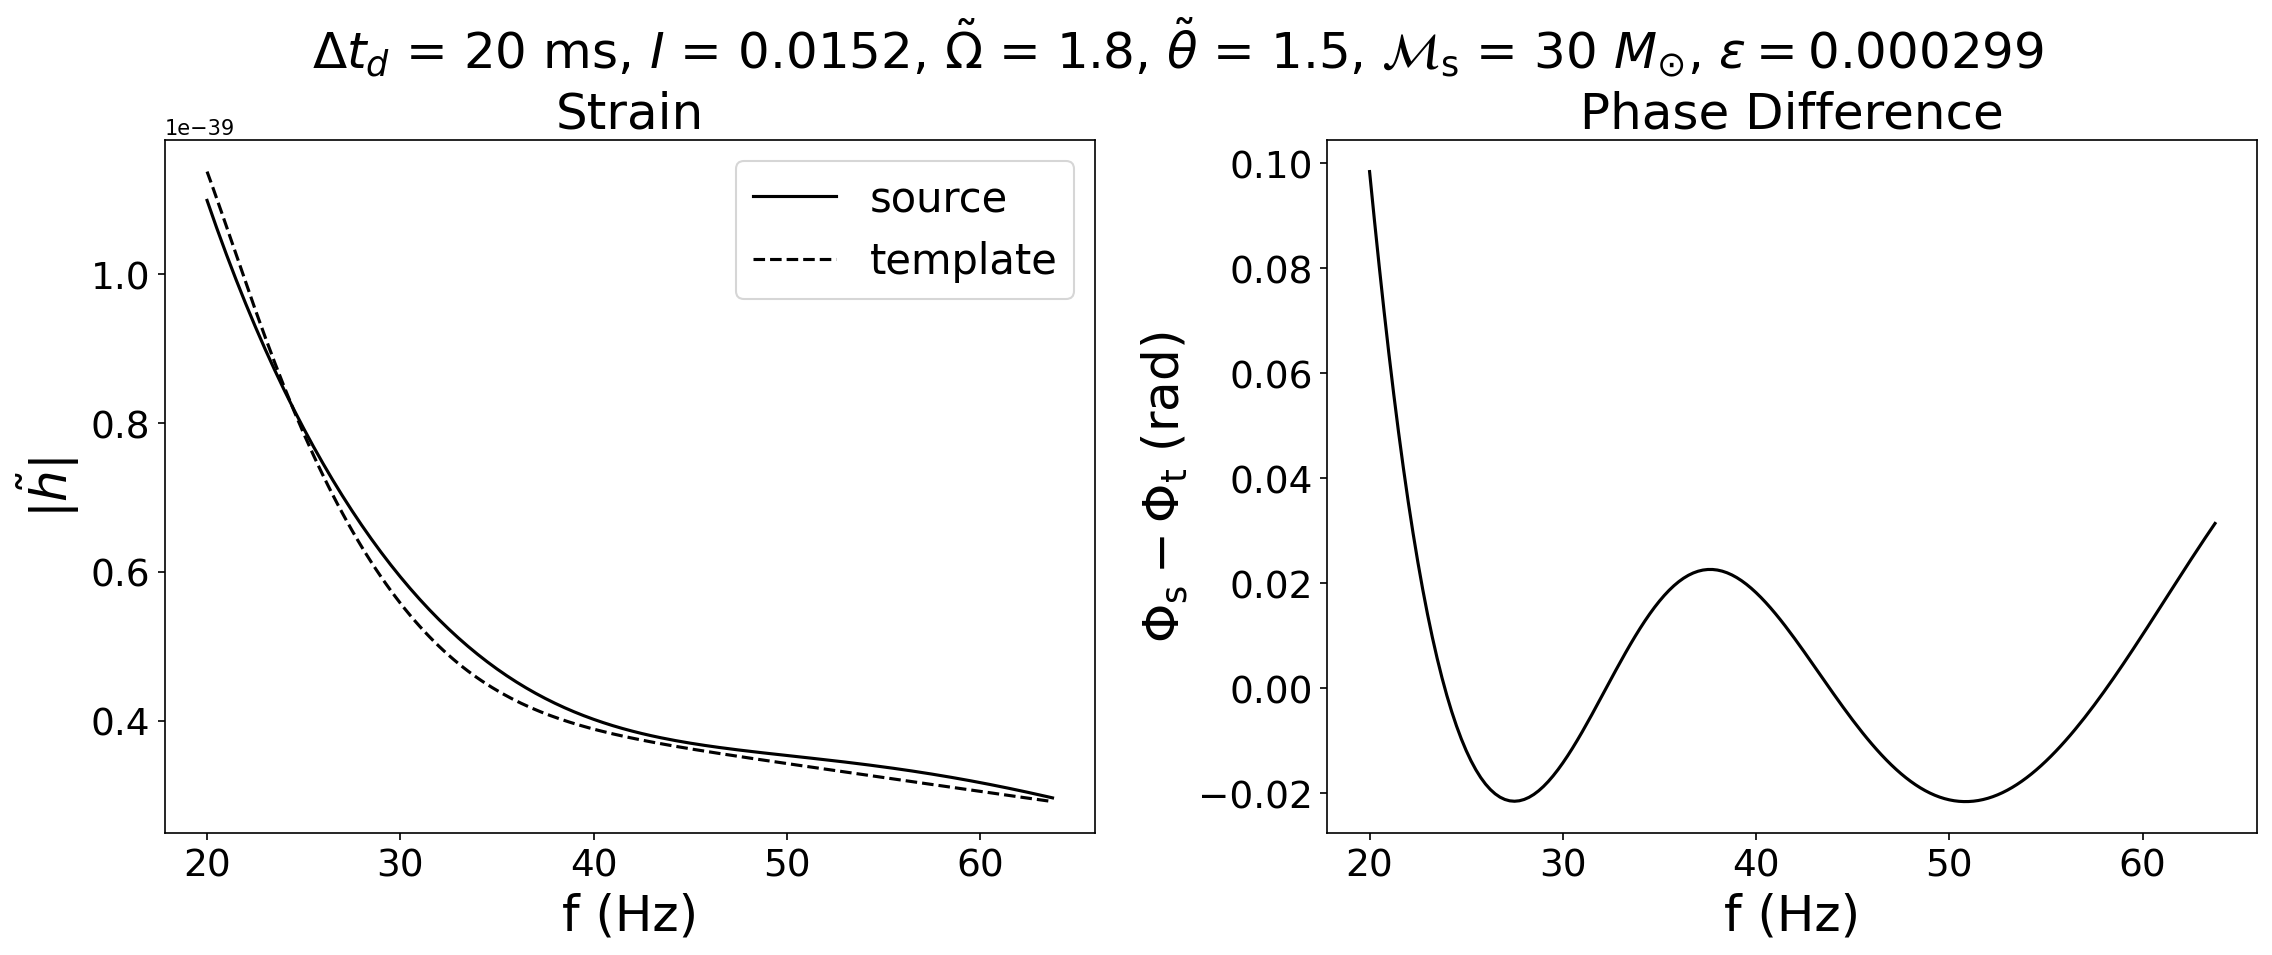

idx = 1.12183e-08, phi = -2.56942e-08, both should be ~0 if get_updated_mismatch_results is True


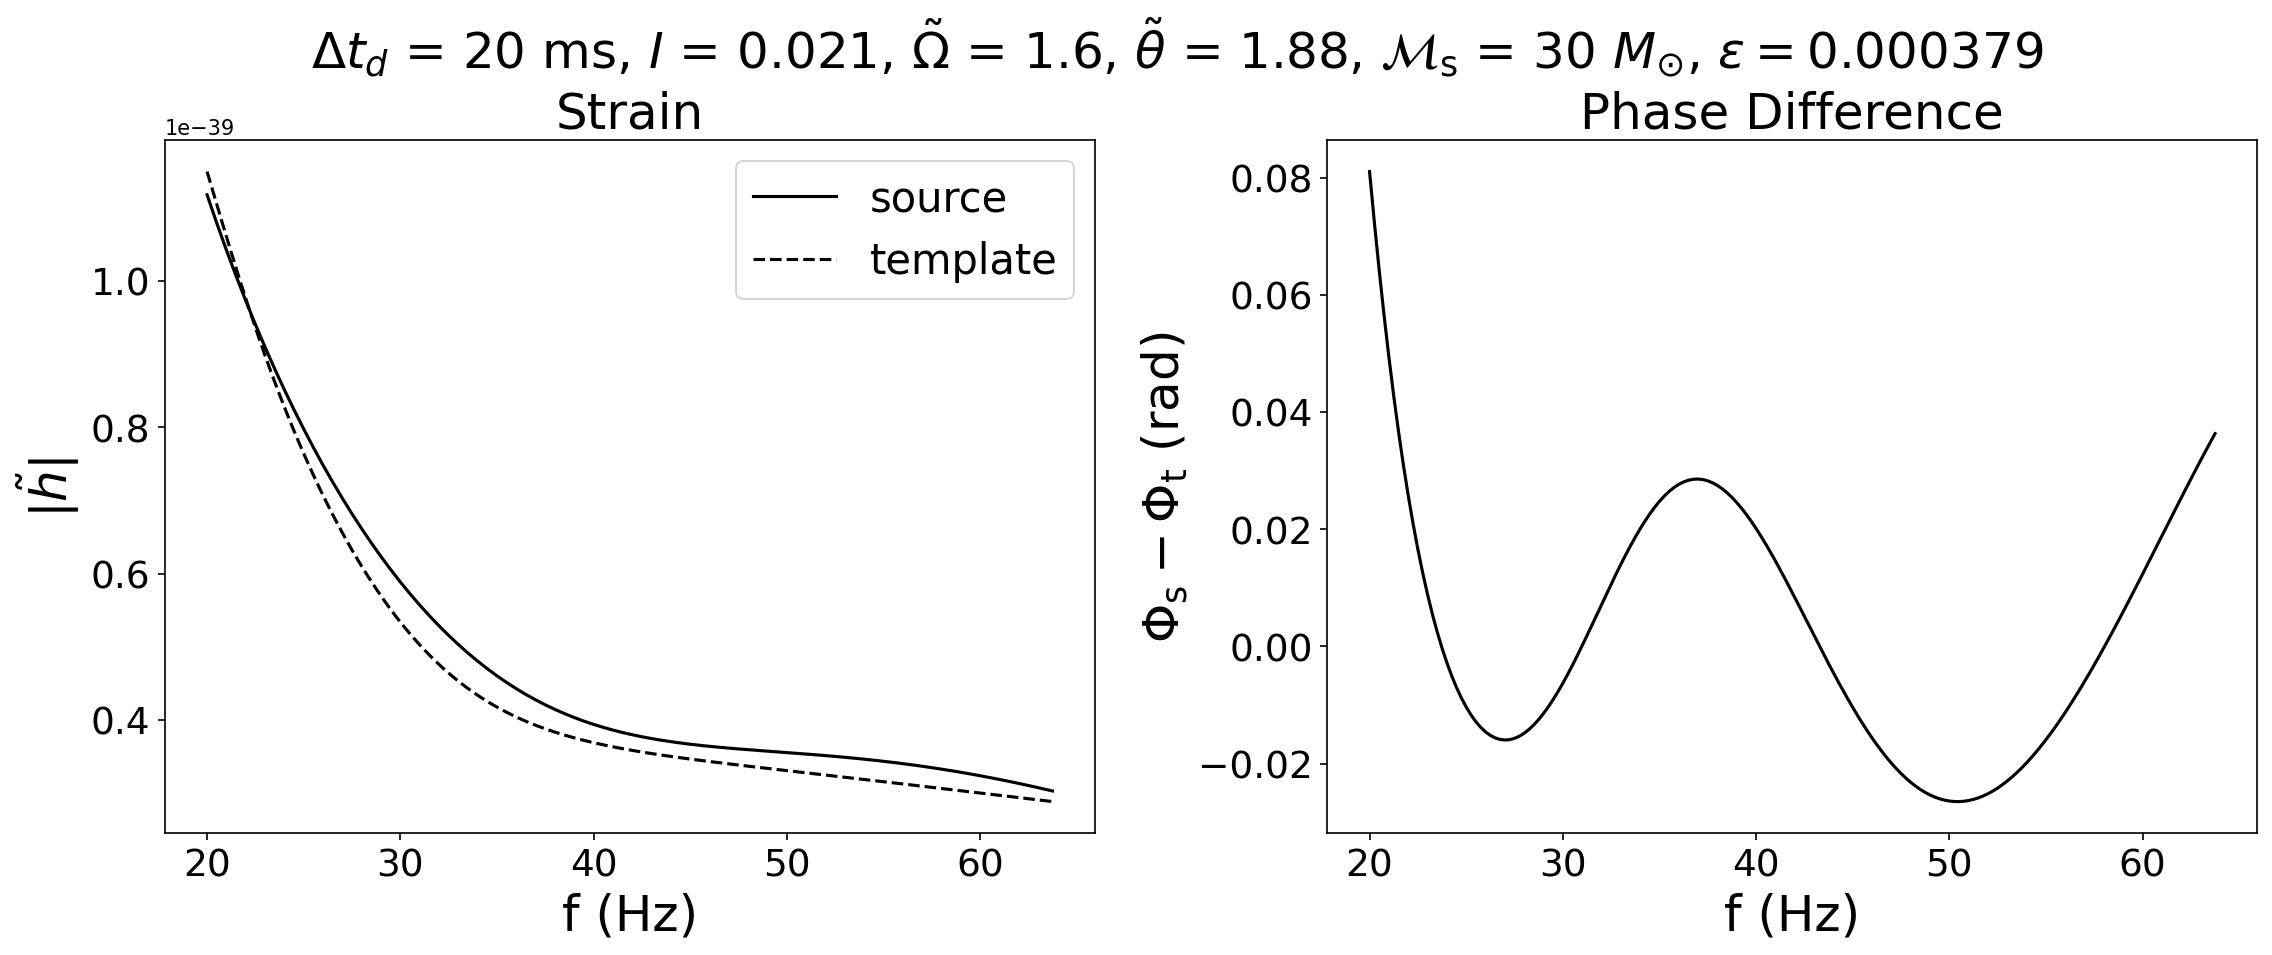

idx = -1.70689e-09, phi = -9.53808e-09, both should be ~0 if get_updated_mismatch_results is True


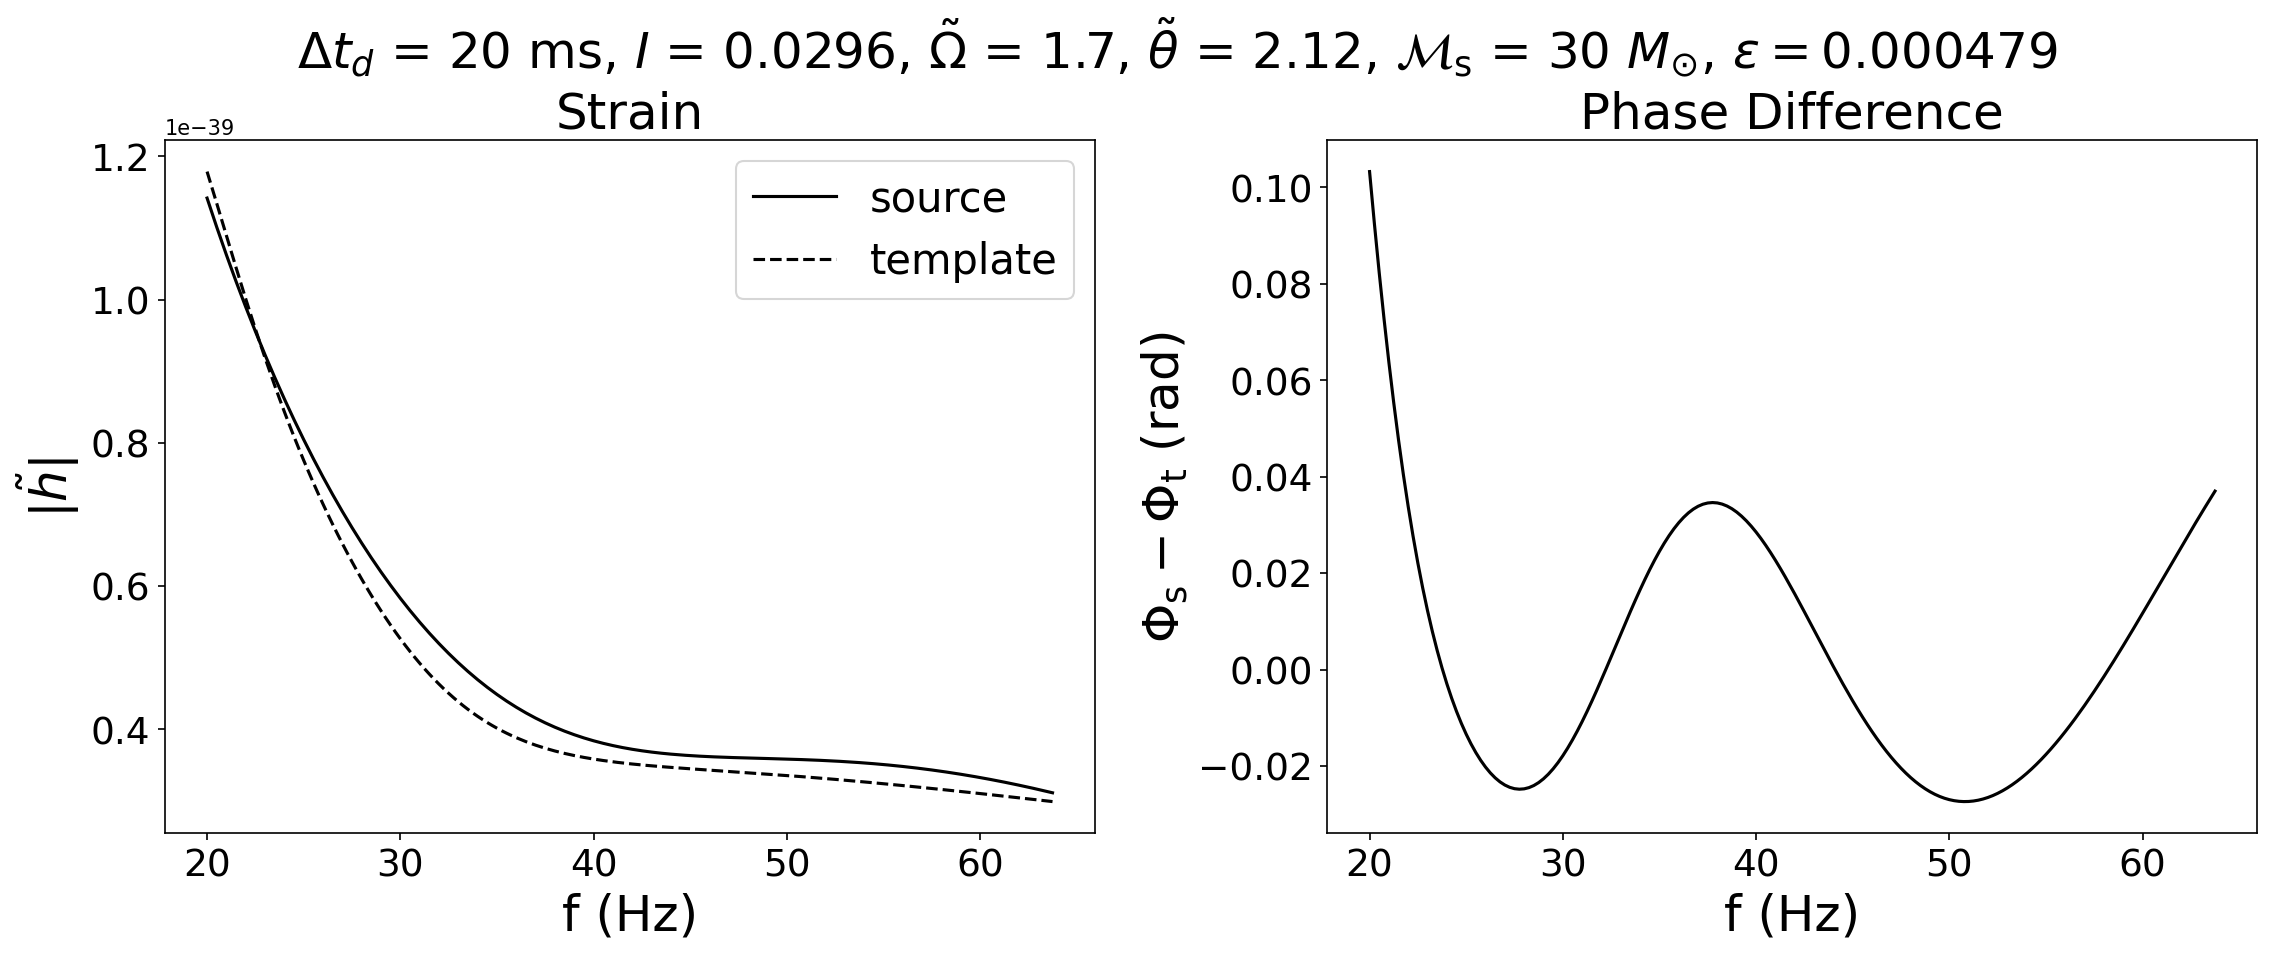

idx = -8.15999e-09, phi = 1.03747e-08, both should be ~0 if get_updated_mismatch_results is True


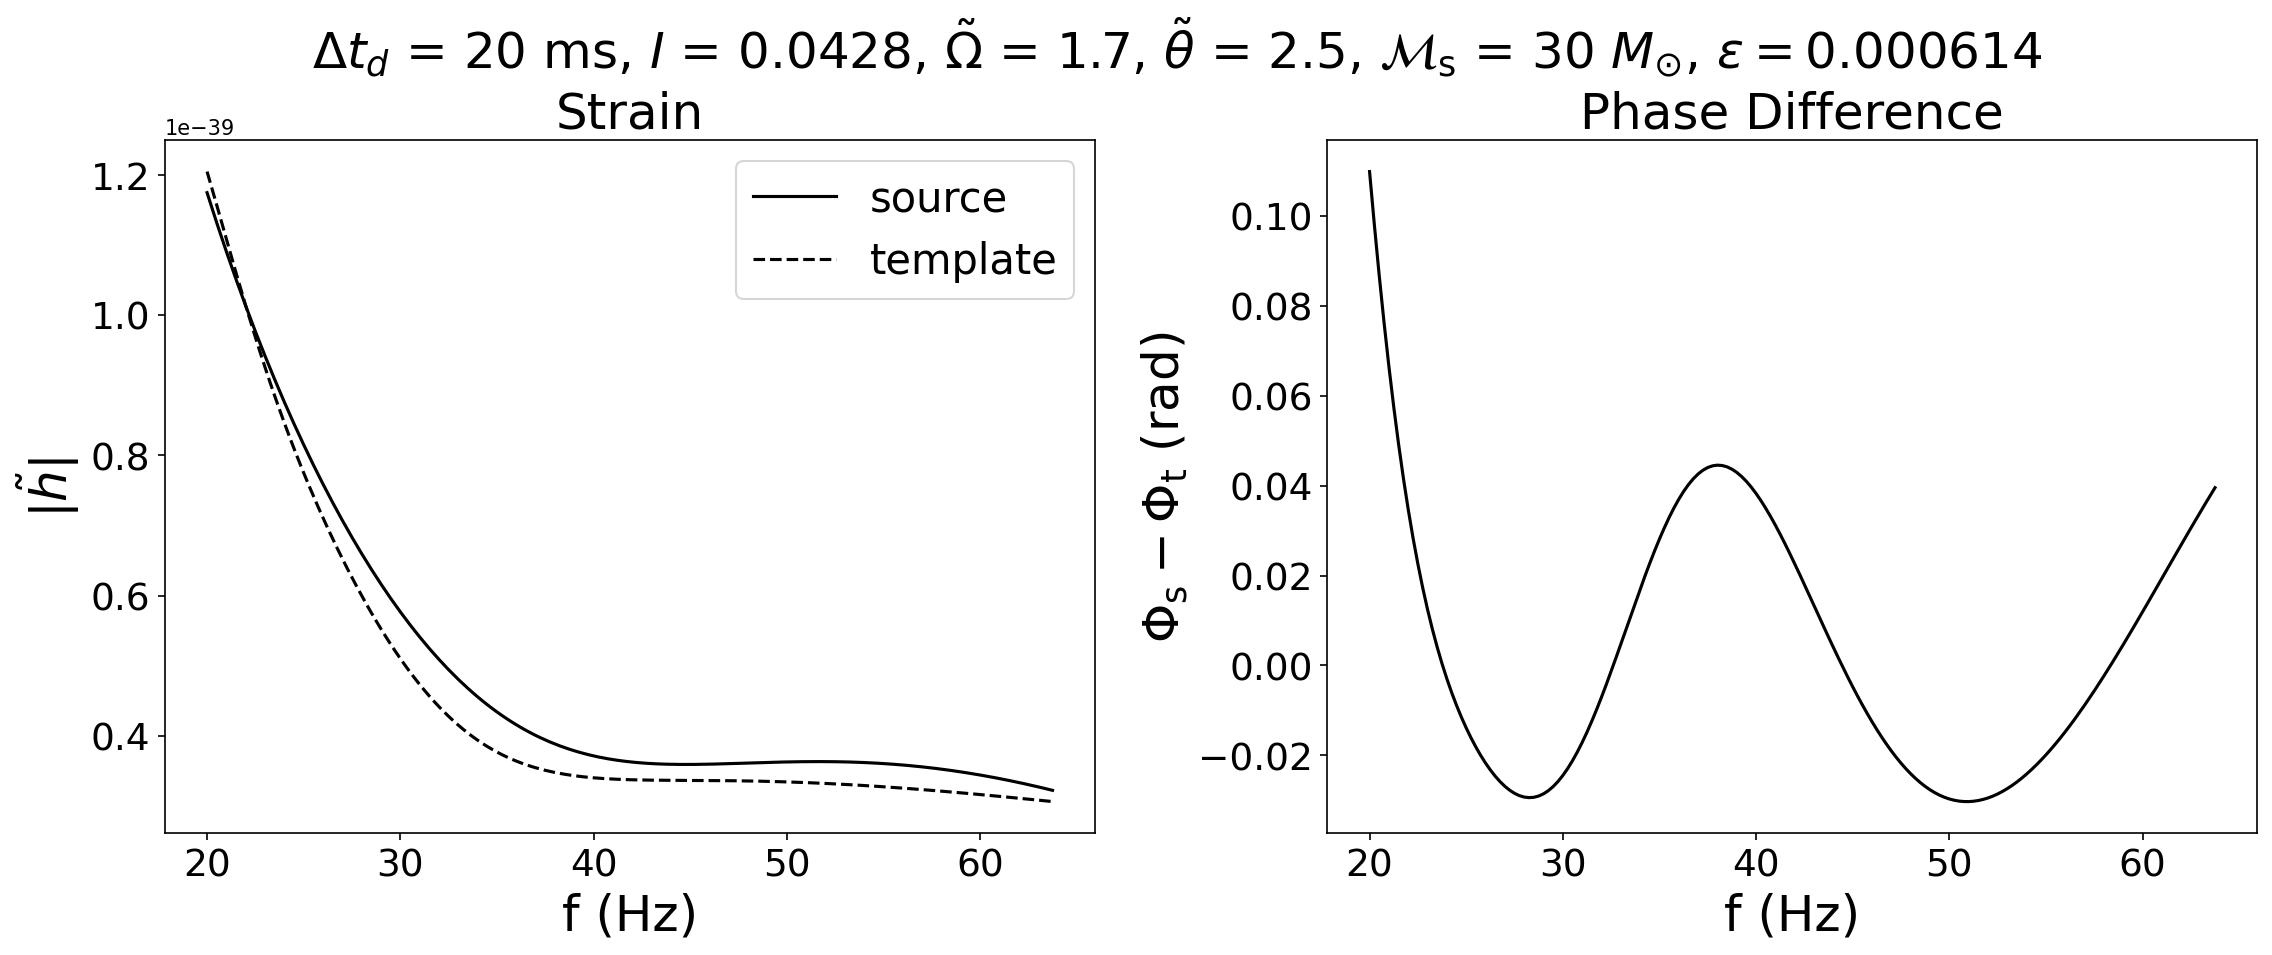

idx = -1.43052e-08, phi = 5.28806e-08, both should be ~0 if get_updated_mismatch_results is True


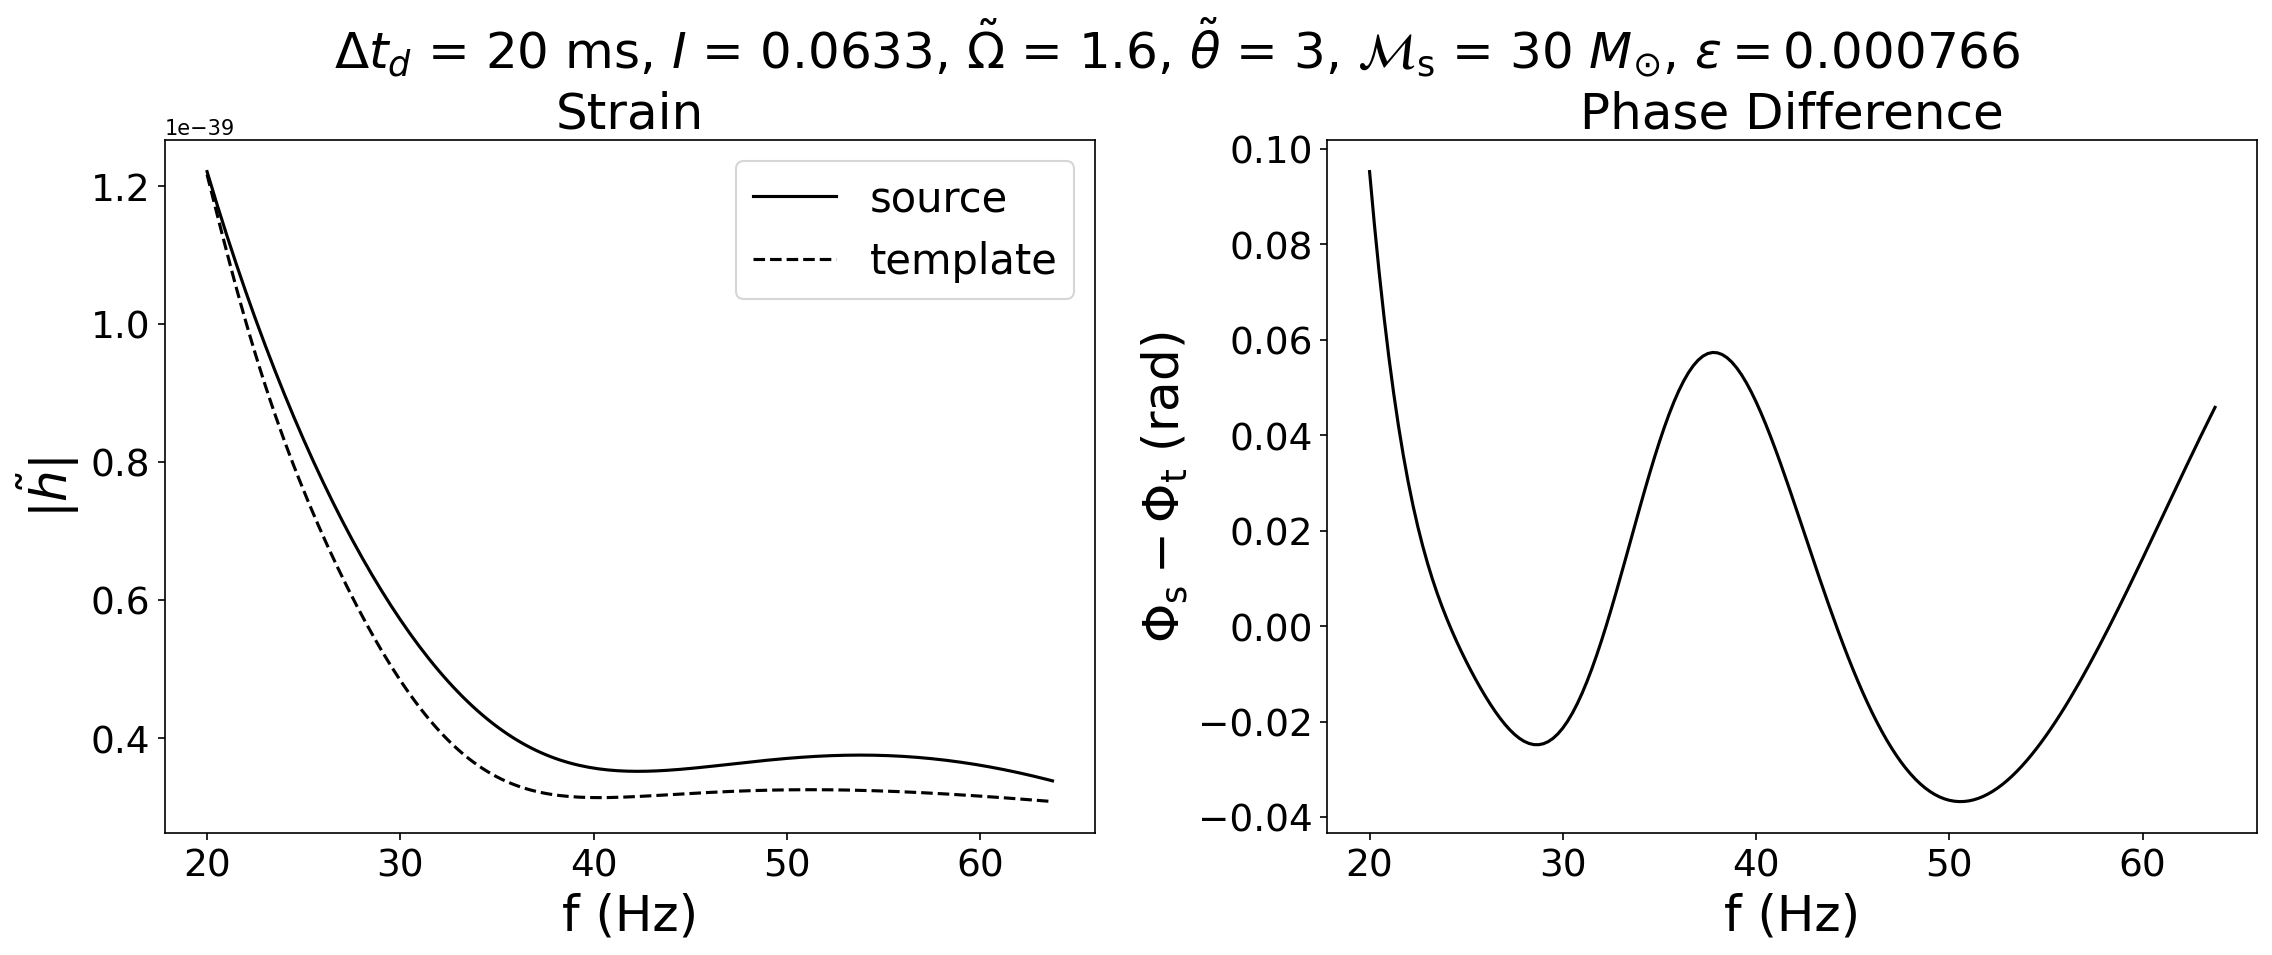

idx = -1.94139e-09, phi = -1.21423e-09, both should be ~0 if get_updated_mismatch_results is True


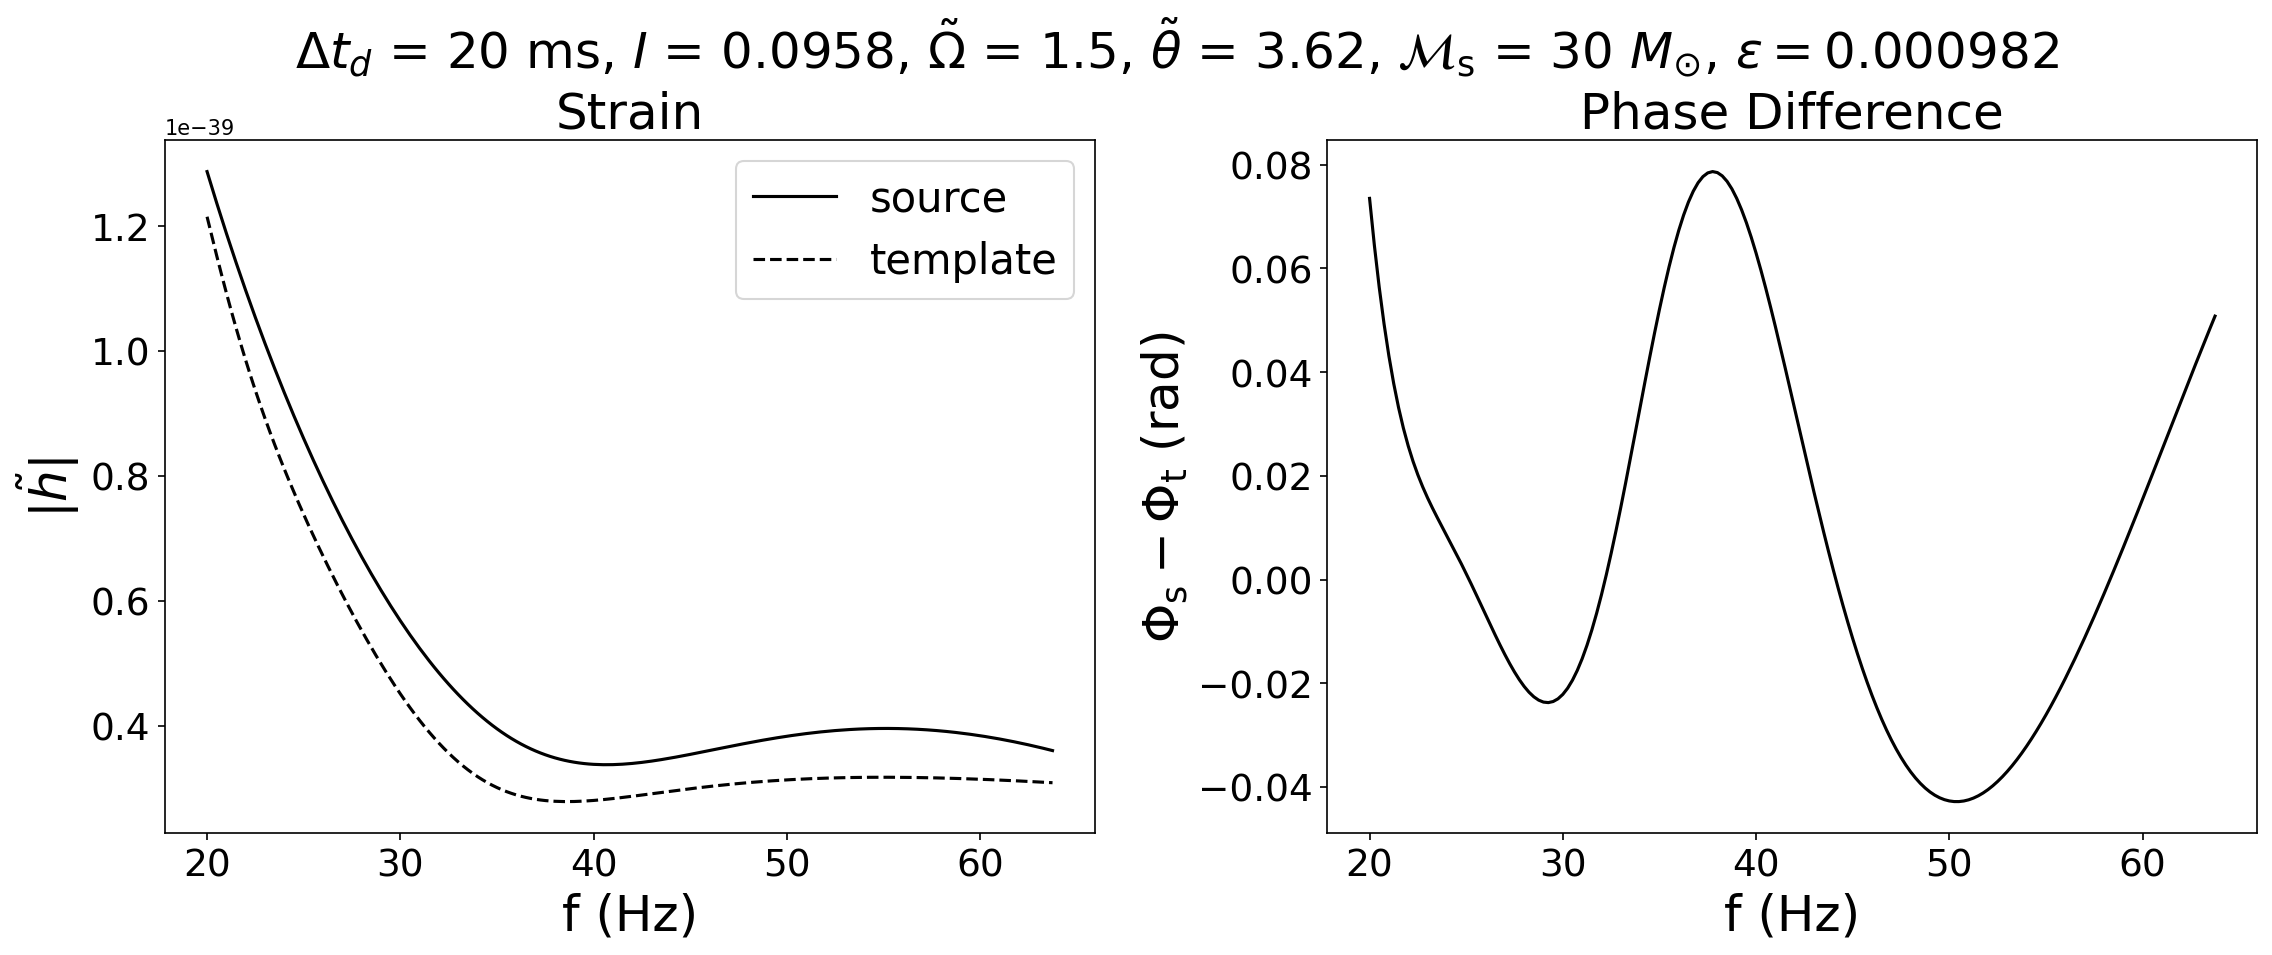

idx = 3.66602e-09, phi = 1.9302e-08, both should be ~0 if get_updated_mismatch_results is True


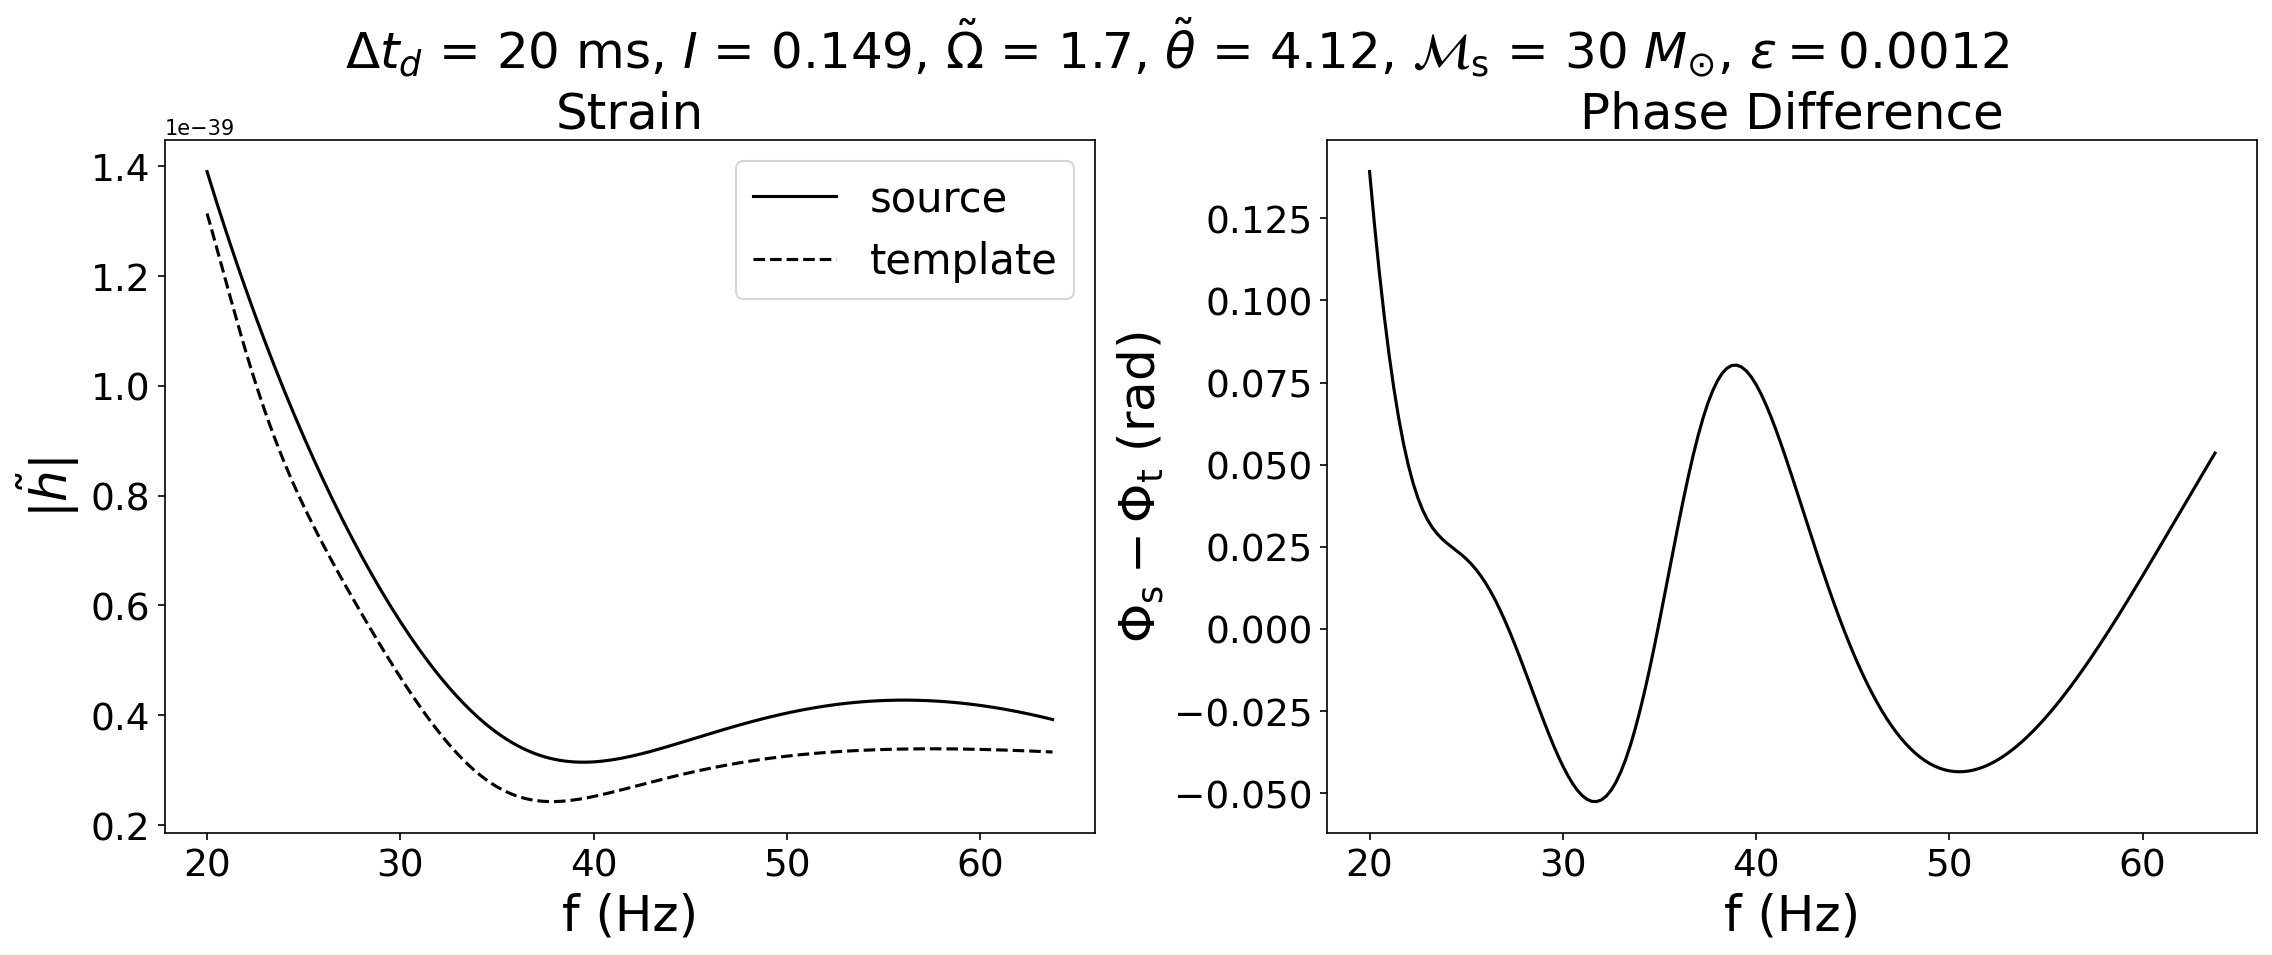

idx = 9.24043e-09, phi = 9.98505e-09, both should be ~0 if get_updated_mismatch_results is True


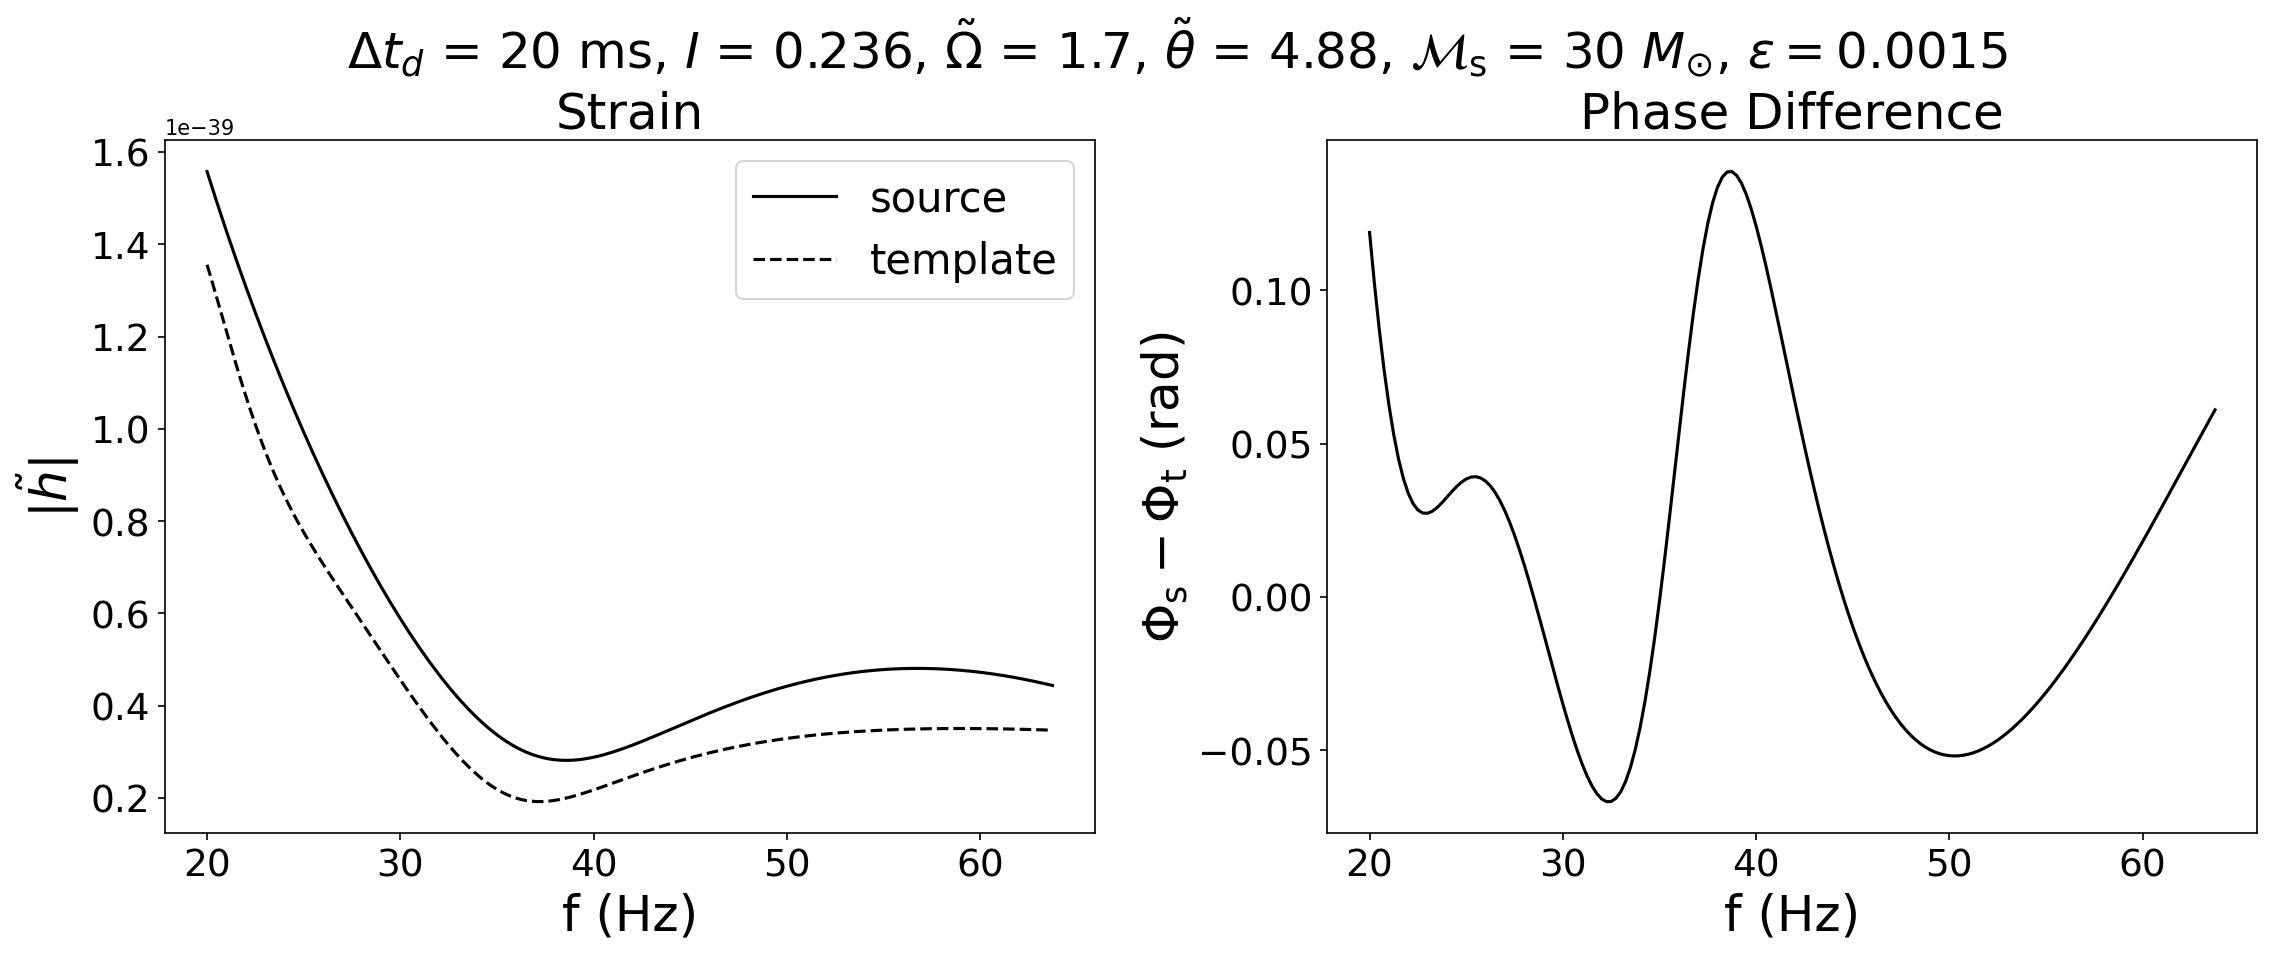

In [27]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()